# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<h1>План проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-данных-и-изучение-первичной-информации." data-toc-modified-id="Чтение-данных-и-изучение-первичной-информации.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение данных и изучение первичной информации.</a></span></li><li><span><a href="#Изучение-распределений-признаков." data-toc-modified-id="Изучение-распределений-признаков.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение распределений признаков.</a></span></li><li><span><a href="#Борьба-с-аномалиями." data-toc-modified-id="Борьба-с-аномалиями.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Борьба с аномалиями.</a></span></li><li><span><a href="#Заполнение-пропусков-и-нулевых-значений." data-toc-modified-id="Заполнение-пропусков-и-нулевых-значений.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Заполнение пропусков и нулевых значений.</a></span></li><li><span><a href="#Проверка-корреляций-между-фичами." data-toc-modified-id="Проверка-корреляций-между-фичами.-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проверка корреляций между фичами.</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-подачи-в-модели-и-вспомогательных-функций." data-toc-modified-id="Подготовка-данных-для-подачи-в-модели-и-вспомогательных-функций.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных для подачи в модели и вспомогательных функций.</a></span></li><li><span><a href="#CatBoostRegressor-без-подбора-гиперпараметров." data-toc-modified-id="CatBoostRegressor-без-подбора-гиперпараметров.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CatBoostRegressor без подбора гиперпараметров.</a></span></li><li><span><a href="#LGBMRegressor-без-подбора-гиперпараметров." data-toc-modified-id="LGBMRegressor-без-подбора-гиперпараметров.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LGBMRegressor без подбора гиперпараметров.</a></span></li><li><span><a href="#LGBMRegressor-с-подбором-гиперпараметров-через-Optuna." data-toc-modified-id="LGBMRegressor-с-подбором-гиперпараметров-через-Optuna.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LGBMRegressor с подбором гиперпараметров через Optuna.</a></span></li><li><span><a href="#CatBoostRegressor-с-подбором-гиперпараметров-через-Optuna." data-toc-modified-id="CatBoostRegressor-с-подбором-гиперпараметров-через-Optuna.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>CatBoostRegressor с подбором гиперпараметров через Optuna.</a></span></li><li><span><a href="#Кодирование-признаков,-формирование-пайплайна-и-подбор-гиперпараметров-через-GridSearchCV." data-toc-modified-id="Кодирование-признаков,-формирование-пайплайна-и-подбор-гиперпараметров-через-GridSearchCV.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Кодирование признаков, формирование пайплайна и подбор гиперпараметров через GridSearchCV.</a></span></li><li><span><a href="#Линейная-регрессия." data-toc-modified-id="Линейная-регрессия.-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Линейная регрессия.</a></span></li><li><span><a href="#ElasticNet-с-подбором-гиперпараметров." data-toc-modified-id="ElasticNet-с-подбором-гиперпараметров.-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>ElasticNet с подбором гиперпараметров.</a></span></li><li><span><a href="#DecisionTreeRegressor-с-подбором-гиперпараметров." data-toc-modified-id="DecisionTreeRegressor-с-подбором-гиперпараметров.-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>DecisionTreeRegressor с подбором гиперпараметров.</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели." data-toc-modified-id="Тестирование-лучшей-модели.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели.</a></span></li><li><span><a href="#Выводы-по-исследованию" data-toc-modified-id="Выводы-по-исследованию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы по исследованию</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

**Порядок исследования**:

- Загрузка и предподготовка данных;
- Исследовательский анализ данных;
- Построение различных моделей и сбор необходимых заказчику метрик;
- Анализ моделей по собранным метрикам, выбор лучшей модели;
- Проведение финальной проверки лучшей модели на тестовой выборке.

In [1]:
#!pip install phik

In [2]:
#!pip install lightgbm

In [4]:
# импортируем необходимые для проведения исследования библиотеки

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import phik
from time import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error,  make_scorer

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

import optuna
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore') 

# сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

sns.set(font_scale=2,
        style='whitegrid',
        rc={'figure.figsize': (20, 16)})

# тут задам глобальную переменную рандома, чтобы не прописывать ее вручную каждый раз
RANDOM = 12345

## Подготовка данных

Прочитаем исходные данные (так как в датафрейме присутствует информация о датах создания и скачивания анкеты из базы, то сразу спарсим даты), выведем случайные 5 строк, общую информацию о датасете (вместе с информацией об абсолютном и относительном количестве пропусков), основные статистики по столбцам и количество явных дубликатов.

Для удобства работы весь процесс реализуем через функции.

### Чтение данных и изучение первичной информации.

In [5]:
try:
    auto = pd.read_csv('autos.csv', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])  
except:
    auto = pd.read_csv('/datasets/autos.csv', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])

In [6]:
def nans(df):
    '''функция выводит количество пропусков в каждом столбце и их долю от общего количества данных в столбце'''
    
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df.reset_index().rename(columns={'index':'column'})

In [7]:
def info_dataframe(data, details=False):
    '''функция преобразует df.info() в датафрейм'''
    
    dfInfo = data.columns.to_frame(name='column')
    dfInfo['dtype'] = data.dtypes
    dfInfo['non_null_count'] = data.notna().sum()  
    dfInfo.reset_index(drop=True, inplace=True)
    
    if details:
        rangeIndex = (dfInfo['non_null_count'].min(), dfInfo['non_null_count'].min())
        totalColumns = dfInfo['column'].count()
        dtypesCount = dfInfo['dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

In [8]:
def all_info(df):
    '''функция выводит случайные 5 строк, информацию по датафрейму, включая пропуски и их долю, статистики и кол-во дубликатов'''
    
    display(df.sample(5))
    print(f'Датафрейм содержит {df.shape[0]} записей и {df.shape[1]} колонки')
    all_info_df = info_dataframe(df).merge(nans(df), on='column')
    display(all_info_df)
    display(df.describe()) 
    print(f'Количество явных дубликатов в датафрейме {df.duplicated().sum()}')

In [9]:
all_info(auto)

DateCrawled  Price VehicleType  RegistrationYear Gearbox  \
32685  2016-04-06 21:36:18   1111       small              1999  manual   
280416 2016-03-31 17:51:49    980         NaN              2017    auto   
318192 2016-03-24 21:46:44   1900         NaN              2017  manual   
137465 2016-03-27 11:50:32   2250         NaN              2017  manual   
345850 2016-03-05 14:19:08   8999       small              2011  manual   

        Power   Model  Kilometer  RegistrationMonth  FuelType       Brand  \
32685      60  fiesta      30000                  7    petrol        ford   
280416      0  megane     150000                 12       NaN     renault   
318192    125  mondeo     150000                  9       NaN        ford   
137465    150  passat     150000                 10       NaN  volkswagen   
345850     90    polo     100000                 10  gasoline  volkswagen   

       Repaired DateCreated  NumberOfPictures  PostalCode            LastSeen  
32685        no  2016-04-06                 0       23936 2016-04-06 21:36:18  
280416      NaN  2016-03-31                 0       24576 2016-04-06 11:44:27  
318192      NaN  2016-03-24                 0       51103 2016-03-29 08:17:15  
137465      NaN  2016-03-27                 0       88239 2016-03-30 16:44:29  
345850       no  2016-03-04                 0       56323 2016-03-21 03:46:14

Датафрейм содержит 354369 записей и 16 колонки


column           dtype  non_null_count  num_missing  \
0         DateCrawled  datetime64[ns]          354369            0   
1               Price           int64          354369            0   
2         VehicleType          object          316879        37490   
3    RegistrationYear           int64          354369            0   
4             Gearbox          object          334536        19833   
5               Power           int64          354369            0   
6               Model          object          334664        19705   
7           Kilometer           int64          354369            0   
8   RegistrationMonth           int64          354369            0   
9            FuelType          object          321474        32895   
10              Brand          object          354369            0   
11           Repaired          object          283215        71154   
12        DateCreated  datetime64[ns]          354369            0   
13   NumberOfPictures           int64          354369            0   
14         PostalCode           int64          354369            0   
15           LastSeen  datetime64[ns]          354369            0   

    percent_missing  
0              0.00  
1              0.00  
2             10.58  
3              0.00  
4              5.60  
5              0.00  
6              5.56  
7              0.00  
8              0.00  
9              9.28  
10             0.00  
11            20.08  
12             0.00  
13             0.00  
14             0.00  
15             0.00

Price  RegistrationYear          Power      Kilometer  \
count  354369.000000     354369.000000  354369.000000  354369.000000   
mean     4416.656776       2004.234448     110.094337  128211.172535   
std      4514.158514         90.227958     189.850405   37905.341530   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       RegistrationMonth  NumberOfPictures     PostalCode  
count      354369.000000          354369.0  354369.000000  
mean            5.714645               0.0   50508.689087  
std             3.726421               0.0   25783.096248  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.000000  
50%             6.000000               0.0   49413.000000  
75%             9.000000               0.0   71083.000000  
max            12.000000               0.0   99998.000000

Количество явных дубликатов в датафрейме 4


In [10]:
total_nans = auto.query('VehicleType.isna() or Gearbox.isna() or Model.isna() or FuelType.isna() or Repaired.isna()')
print(f'Общее количество пропущенных значений: {round((total_nans.shape[0] / auto.shape[0]) * 100, 2)}%')

Общее количество пропущенных значений: 30.63%


Итак, наш датасет содержит 16 колонок и 354369 строк. Каждая запись содержит информацию о конкретном автомобиле: как его технические характеристики (модель, марка, тип кузова/коробки передач/топлива, пробег и мощность), так и информацию о его состоянии (год регистрации и была ли машина в ремонте) и вспомогательную информацию об анкете и активности пользователя, которому принадлежит автомобиль.

- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

Целевым признаком для нашего исследования является

- `Price` — цена (евро).

Типы данных в колонках представлены как `object` и `int64` (это будут категориальные и числовые признаки соответственно), также три колонки `DateCrawled`, `DateCreated` и `LastSeen` мы сразу при загрузке датафрейма привели к типу `datetime`, так как они содержат информацию о датах.
Явного расхождения типа данных некоторого столбца и информации, которую он содержит, не обнаружено. 

В данных присутствует много пропущенных значений:

- 37490 строк (10.58% от всех записей) в колонке `VehicleType`, 
- 19833 строк (5.60% от всех записей) в колонке `Gearbox`, 
- 19705 строк (5.56% от всех записей) в колонке `Model`, 
- 32895 строк (9.28% от всех записей) в колонке `FuelType`, 
- 71154 строк (20.08% от всех записей) в колонке `Repaired`,

то есть всего примерно около 31% записей датасета содержит те или иные пропуски.

Для принятия решения о заполнении или удалении этих записей, следует провести подробный анализ.
Также в датафрейме присутствуют 4 явных дубликата, которые следует удалить.

In [11]:
# удаляем явные дубликаты
auto.drop_duplicates(inplace=True)
auto.duplicated().sum()

0

**Выводы**

Произведено чтение файла и первичный осмотр датасета.

Предварительно можно утверждать, что, данных достаточно для построения моделей, однако, для последующего обучения требуется устранить в них пропуски, а также изучить на наличие аномалий, и в случае их присутствия также почистить данные от выбросов. 
Для этого проведем исследовательский анализ данных, выделим категориальные и числовые признаки, оценим значения в колонках и построим распределения.

### Изучение распределений признаков.

Проведем беглый осмотр распределения признаков, построив гистограммы.

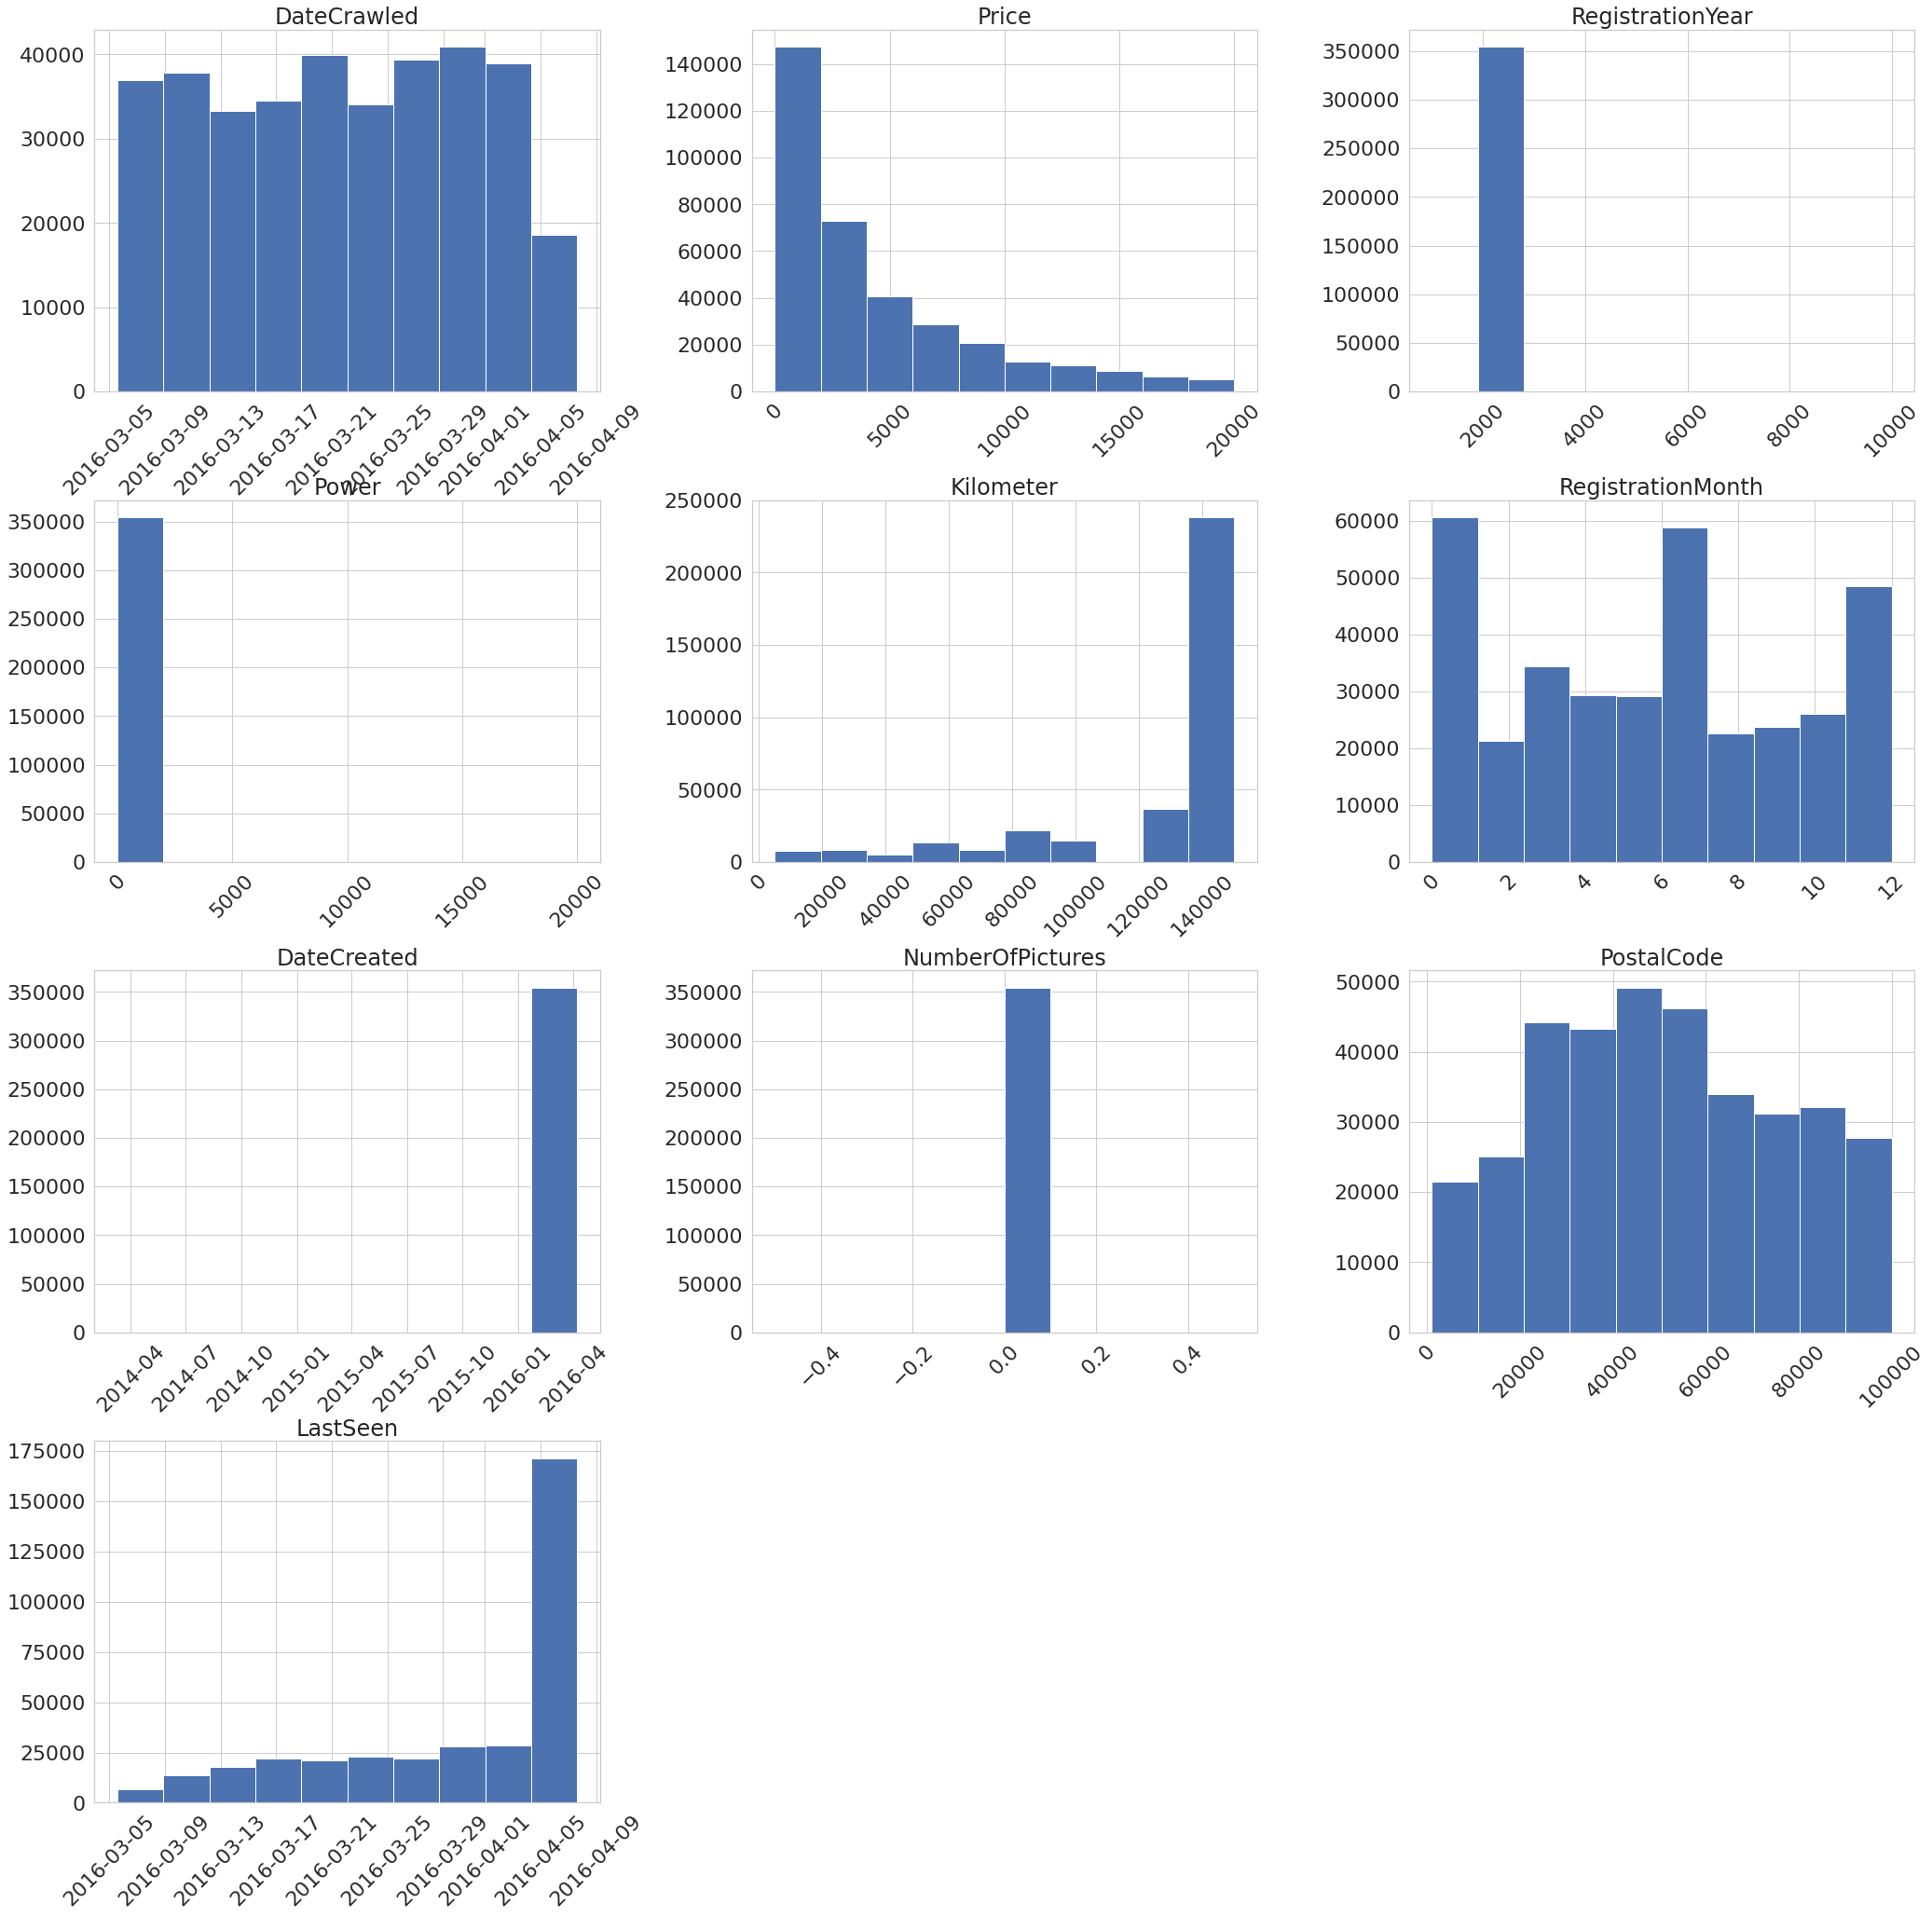

In [12]:
 auto.hist(figsize=(35, 35), xrot=45);

Выделим по-отдельности категориальные и числовые фичи, для того, чтобы удобнее было оценивать распределение признаков.

In [13]:
cat_cols = auto.select_dtypes(include=['object']).columns
num_cols = auto.select_dtypes(include=['int64']).columns
cat_cols

Index(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired'], dtype='object')

In [14]:
num_cols

Index(['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth',
       'NumberOfPictures', 'PostalCode'],
      dtype='object')

Визуализируем более подробно распределение числовых фичей с помощью гистограммы и боксплота.

In [15]:
def dist_and_box(df, col):
    '''функция строит гистограмму и боксплот по подаваемому признаку'''
    
    fig, axs = plt.subplots(ncols=2,figsize=(22, 8))
    sns.set(font_scale=1.15)
    
    gr1 = sns.distplot(df[col], kde=False, ax=axs[0])
    gr2 = sns.boxplot(df[col], ax=axs[1], orient='h')
    
    gr1.set(title=f'Распределение признака {col}', xlabel=f'{col}', ylabel='Количество объектов')
    gr2.set(title=f'Распределение признака {col}', xlabel='Значение признака', ylabel=f'{col}')

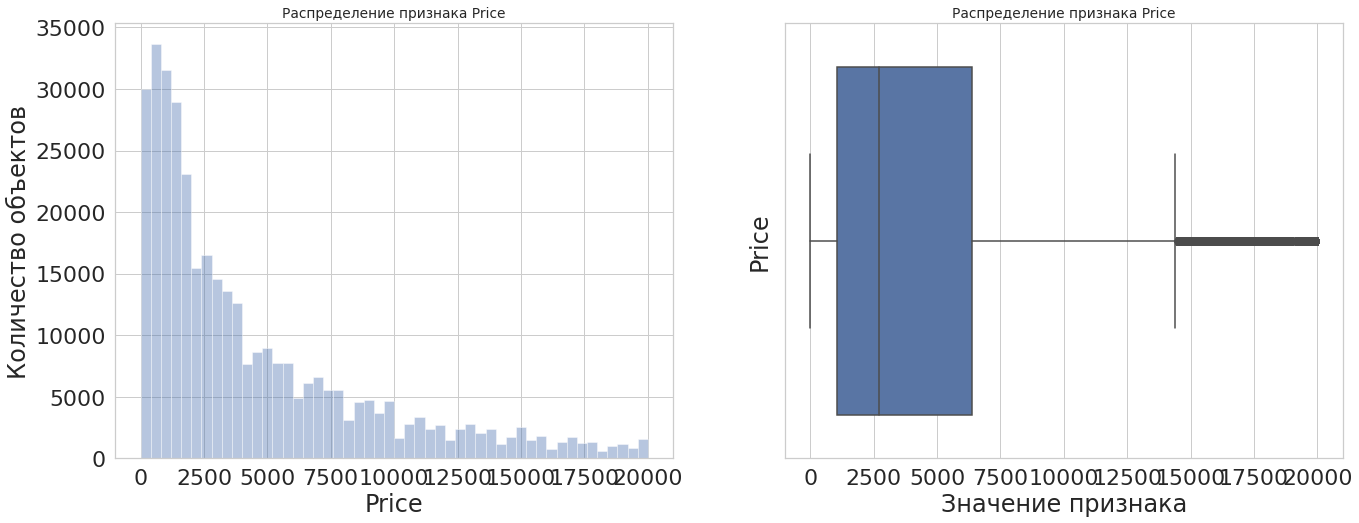

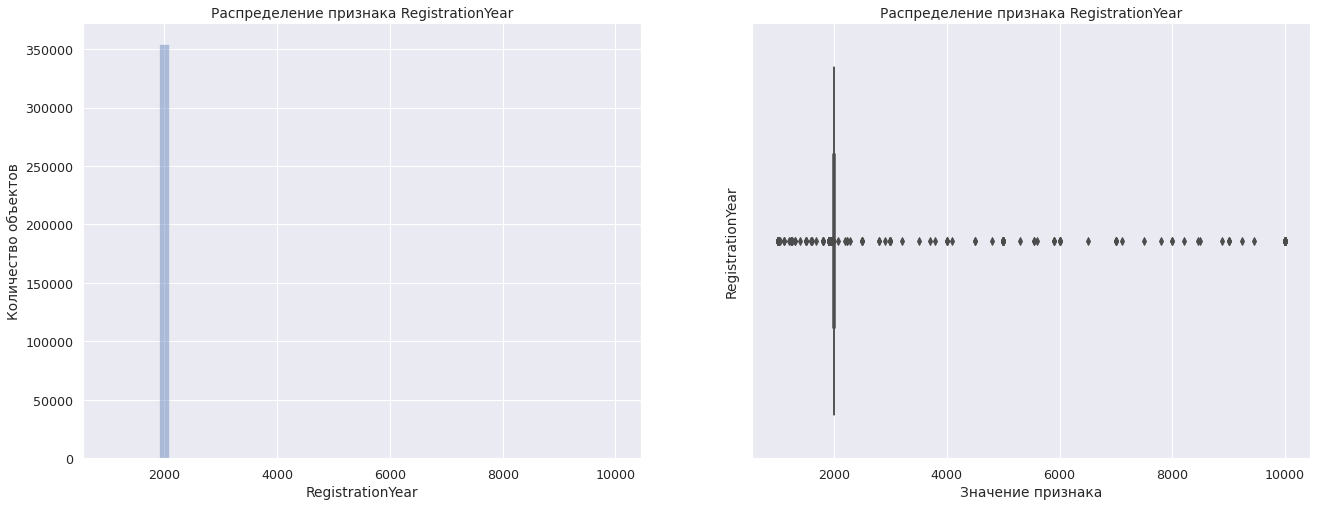

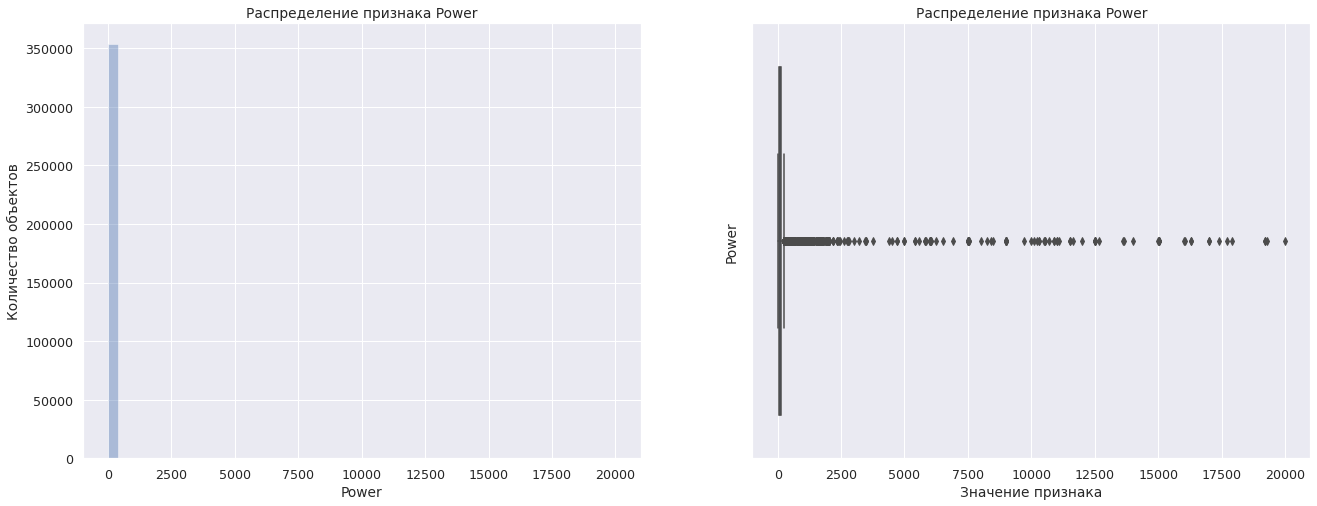

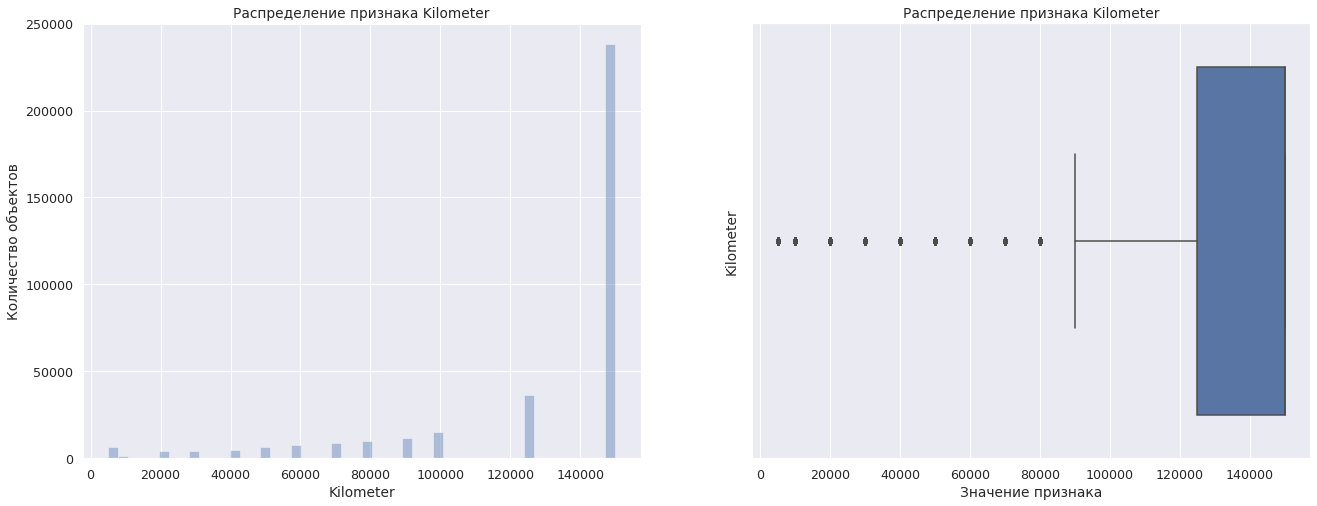

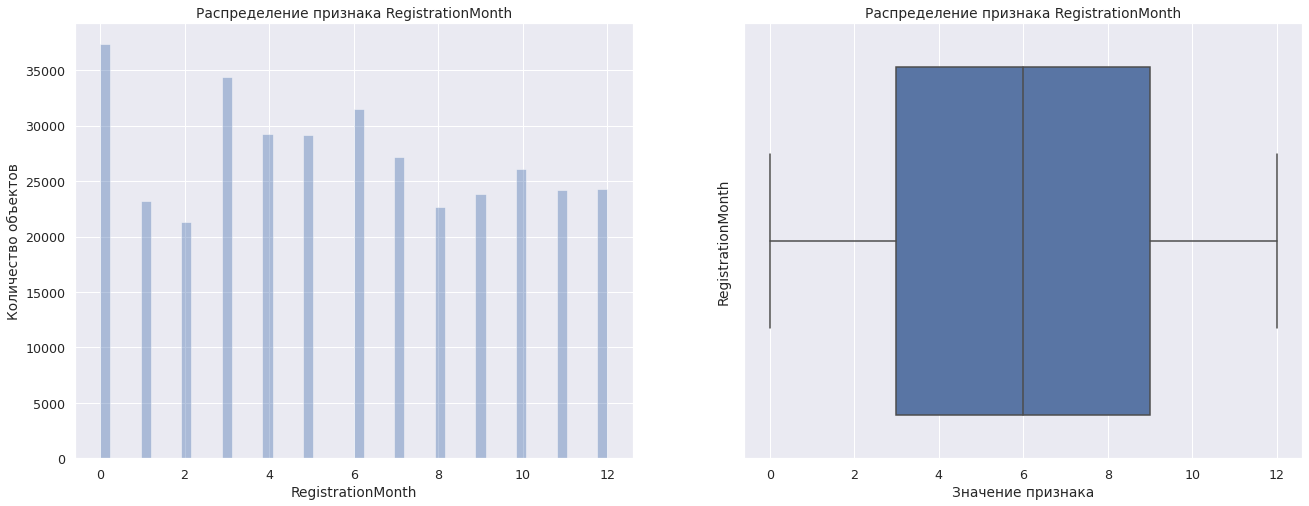

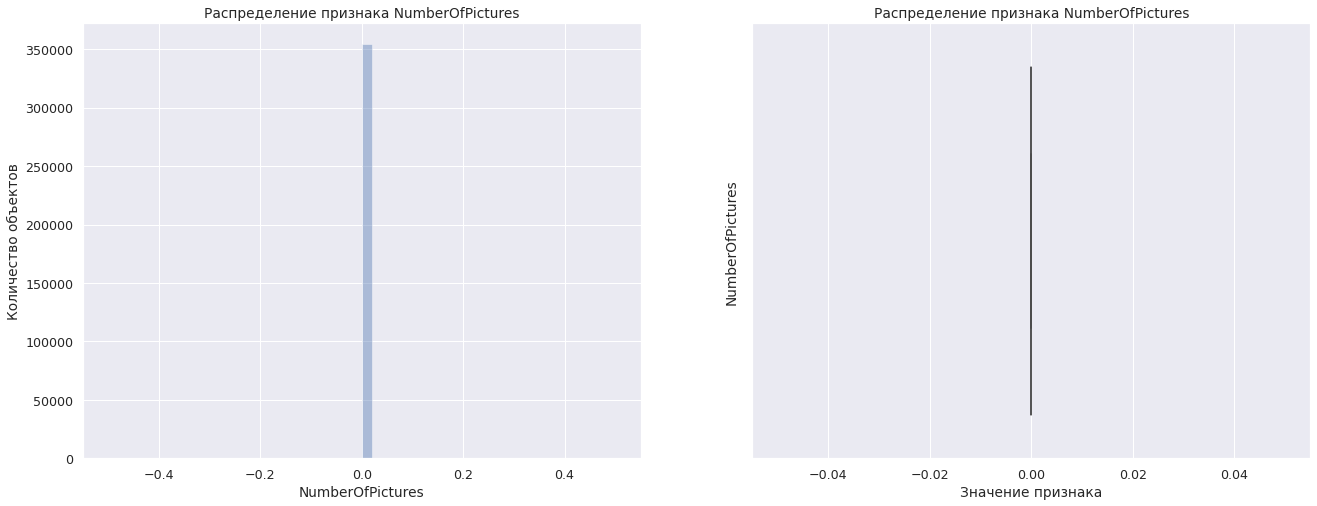

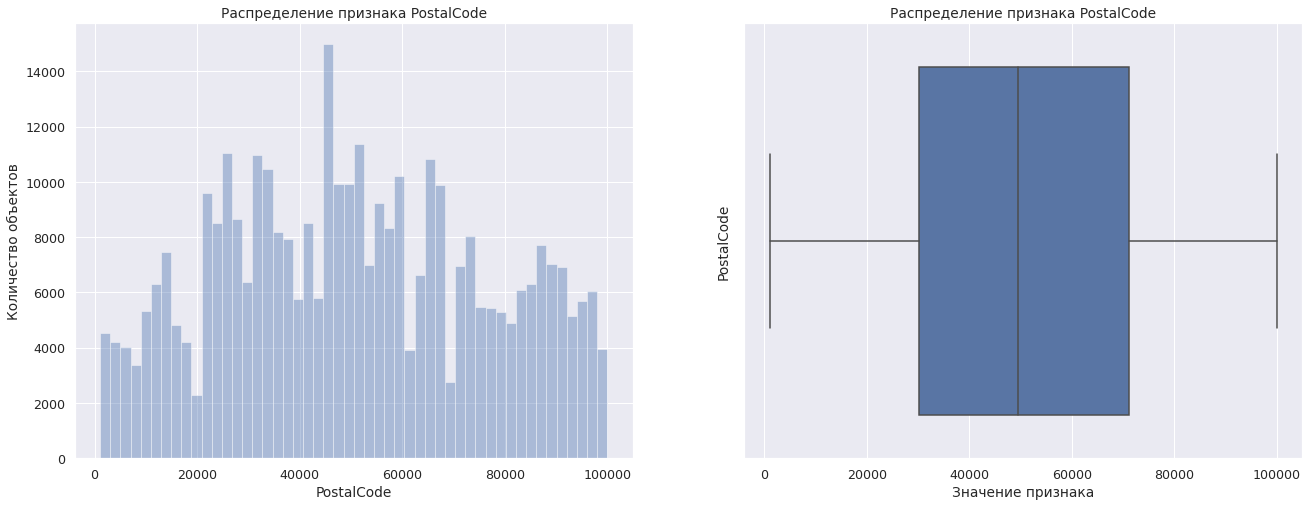

In [16]:
for col in num_cols:
    dist_and_box(auto, col)

Судя по значения колонок `DateCrawled` и `LastSeen` временным промежутком рассматриваемых данных является интервал с начала марта по начало апреля 2016 года.

По графикам хорошо видно, что данные в некоторых колонках содержат многочисленные выбросы, что влияет на тип их распределения.

- Признак `RegistrationYear` содержит очевидные выбросы, так как имеет значения года регистрации больше 2500, хотя 75% данных лежат ниже значения 2008.
- Заметные выбросы присутствуют и у признака `Power` - значения мощности двигателя варьируются от 0 до 20000 л.с., при этом 75% значений меньше 143.
- Очень неравномерно распределен признак с пробегом автомобилей `Kilometer`, по большей части в нашем датасете содержится инормаци о машинах с пробегам более 125 тыс.км., однако, есть и исключения в меньшую сторону (минимум в 5 тыс.км.).
- Признак `RegistrationMonth` (месяц регистрации автомобиля) распроделен достаточно равномерно, однако, содержит нулевые значения, которые нужно будет заменить.
- Информация по колонке `NumberOfPictures`, по всей видимости, содержится в других базах, так как в данном датасете содержит только нулевые значения, а потому не несет никакой информативности.
- Значения в колонке `PostalCode` распредены близко к нормальному закону.
- Целевой признак `Price` имеет скошенное влево распределение с размахом значений от 0 до 10000 со средним в 4416, что также говорит о наличии выбросов.

Рассмотрим распределение целевого признака Price по категориальным фичам с разбивкой по уникальным значения в колонках.

In [17]:
price_auto = auto[['VehicleType', 'Gearbox', 'FuelType', 'Repaired', 'Brand', 'Price']].melt(id_vars='Price')

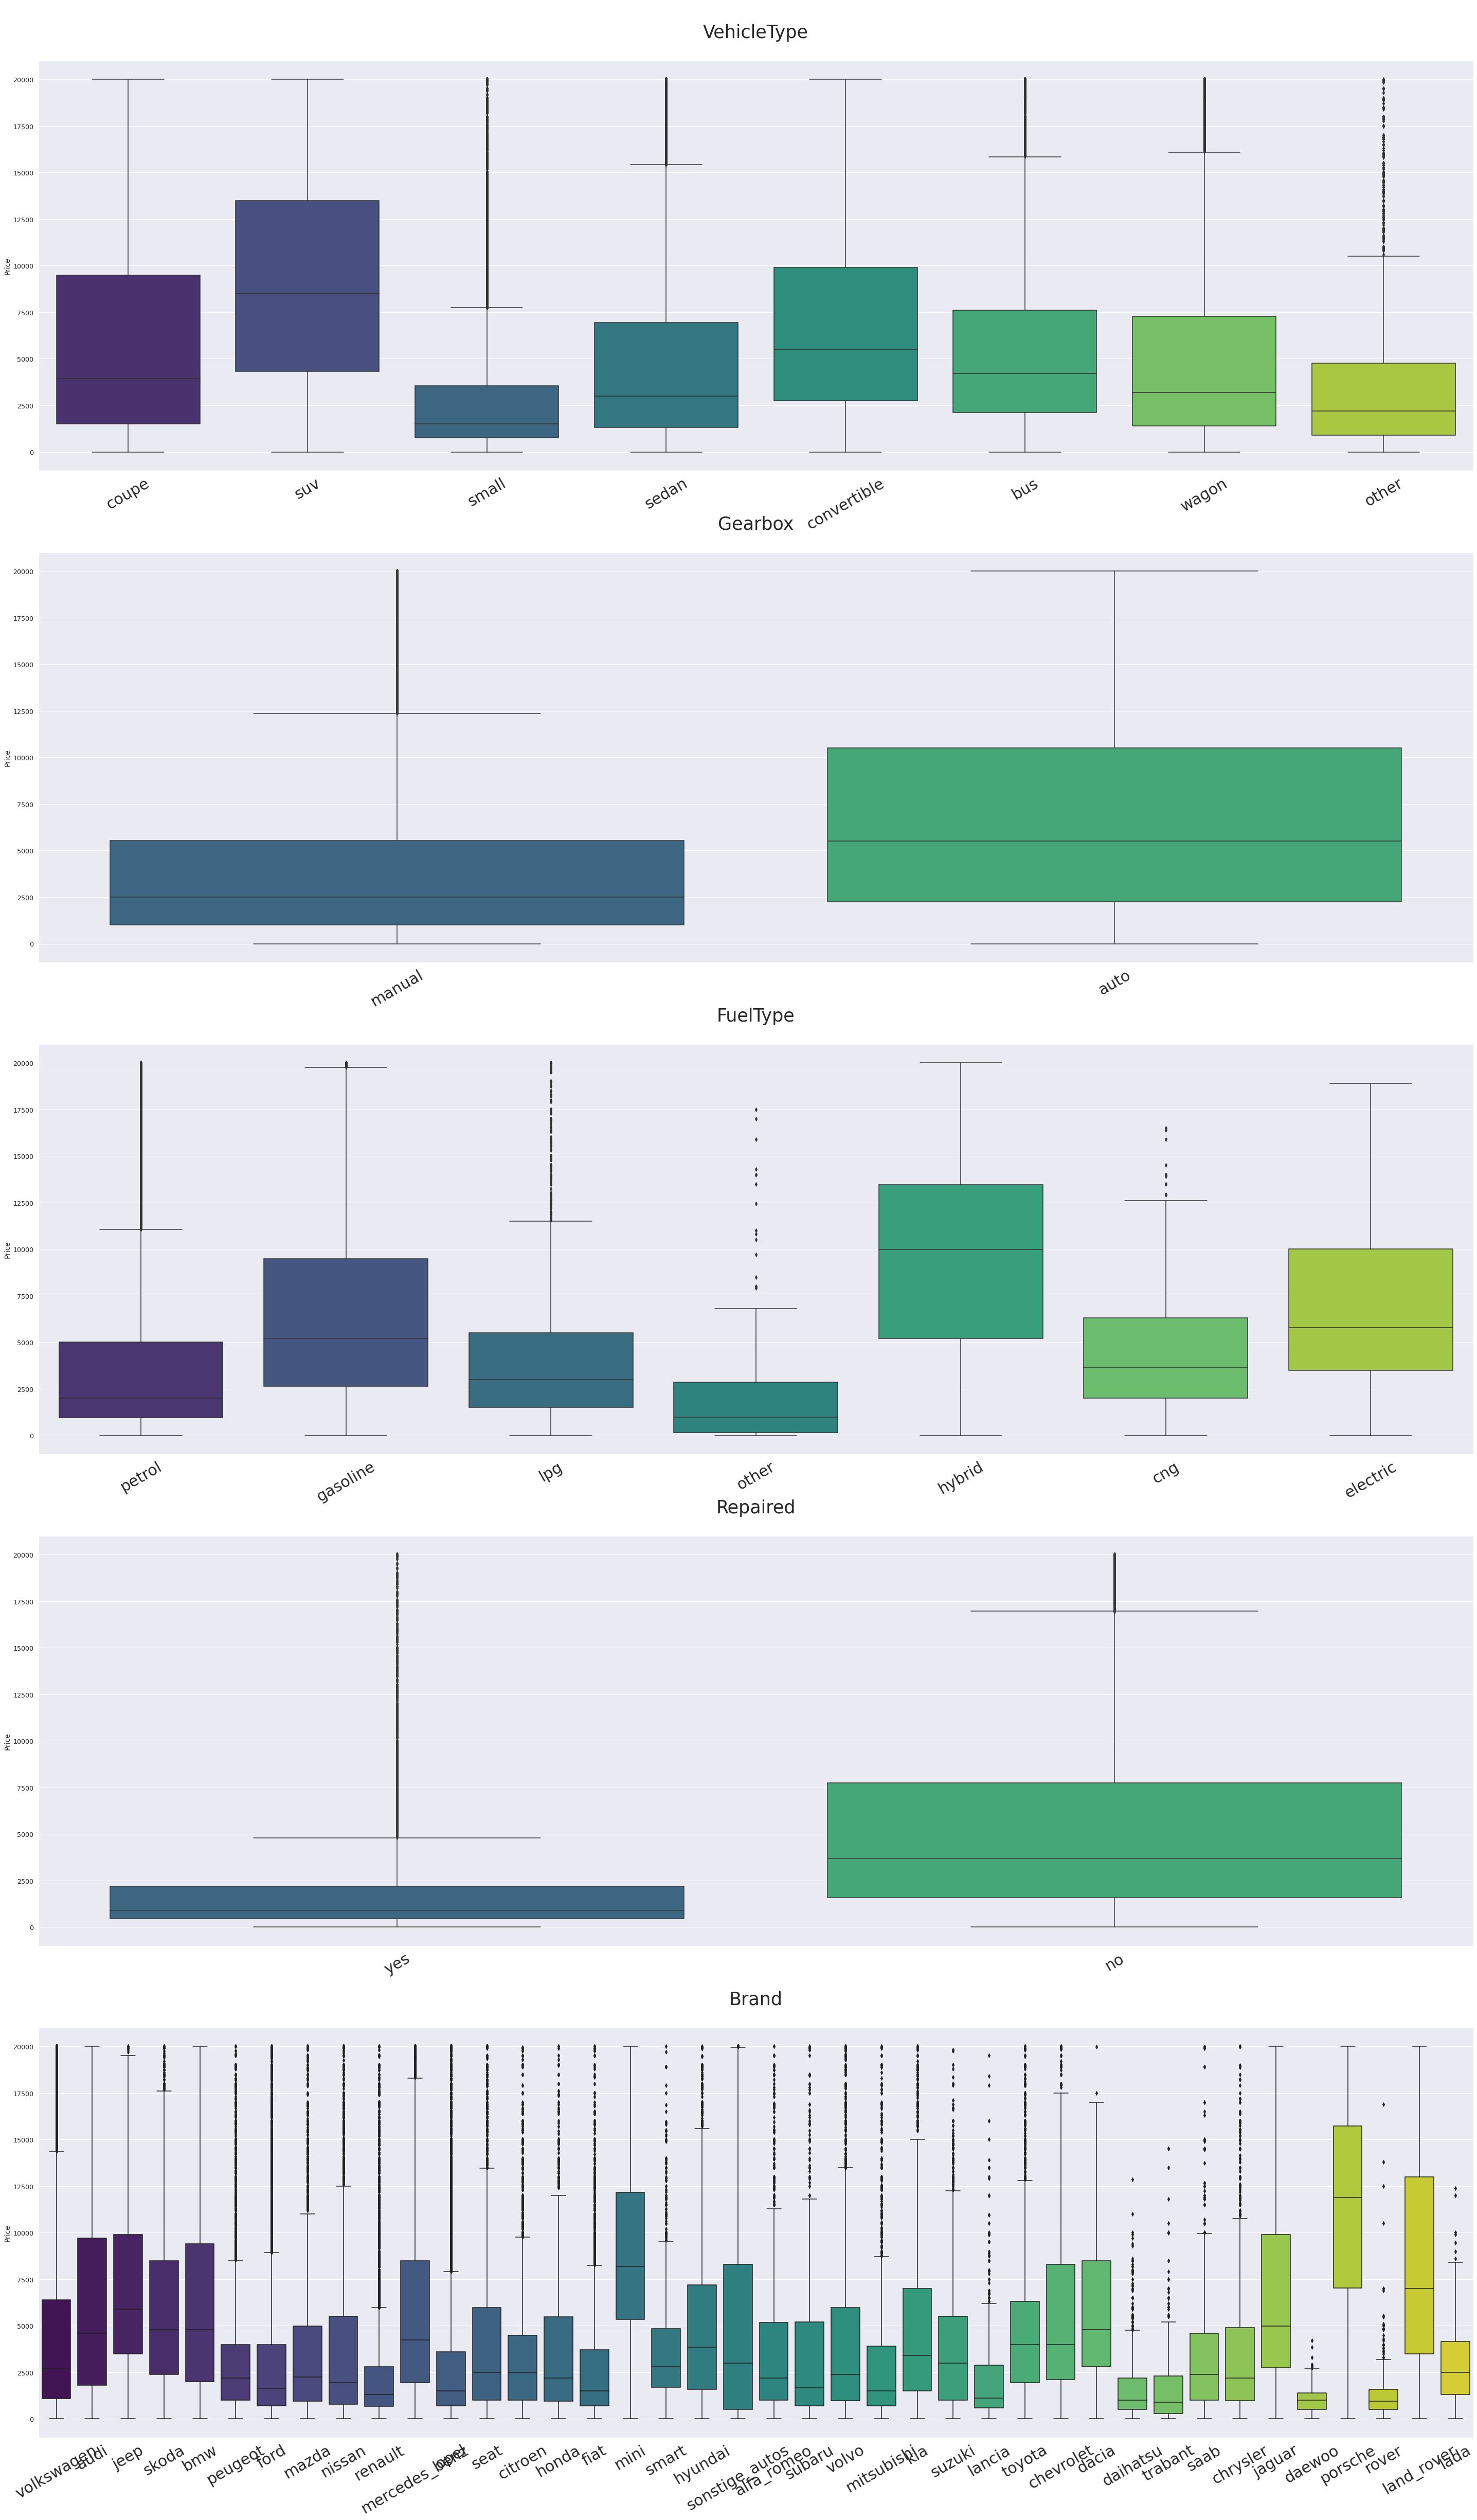

In [18]:
fig, axes = plt.subplots(nrows=5, figsize=(50, 85))

for num, val in enumerate(price_auto.variable.unique()):
    gr = sns.boxplot(data=price_auto[price_auto.variable == val],
            y='Price',
            x='value',
            palette='viridis',
            ax=axes[num])
    gr.set_xticklabels(gr.get_xticklabels(), rotation=30, fontsize=30)
    gr.set_title(f'\n{val}\n', fontsize=35)
    gr.set(xlabel='')

- Самыми дорогими являются машины с типами кузова suv, convertible и coupe, самими дешевыми в среднем с типом кузова small.
- В большей цене машины с автоматической коробкой передач.
- Большей ценой отличаются модели с гибридным типом топлива и электрокары.
- Следуя логике, в среднем цена на неремонтированные машины выше, чем на побывавшие в ремонте.
- На цену сильно влияет марка автомобиля: самые дорогие варианты у Porsche, LandRover и Mini; самыми доступными по цене являются представители брендов Renault, Daewoo Rover. 

**Выводы**

В данных заметно большое количество выбросов, которые сильно искажают форму распределений признаков. Так как выбросы плохо влияют на качество предсказаний моделей машинного обучения, то необходимо принять меры по их устранению.

### Борьба с аномалиями.

Так как наши данные содержат много аномалий, которые могут существенно испортить в дальнейшем предсказания построенных нами моделей, то их нужно удалить. Для себя я выделила два способа борьбы с аномалиями:
    
- отсечка всех данных лежащих по обе стороны за определенными квантилями, задаваемыми вручную,
- отсечка всех данных лежащих по обе стороны от полуторной величины межвартильного размаха.

Функции ниже написаны для обоих случаев и возвращают датафреймы без аномалий.

Опытным путем для дальнейшей работы с данным датафреймом я выбрала отсечь все выбросы ниже 3 и выше 97 квантиля, так как в этом случае, на мой взгляд, достигается приемлемое соотношение между "чистотой" данных и количеством оставляемых в датафрейме строк.

In [19]:
def df_within_iqr(df, column):
    '''функция, возвращает датафрейм без выбросов по полуторному межквартильному размаху'''   
    df_new = df.copy()
    
    # считаем 1% и 99% процентили как границы межквартильного размаха в первоначальном датафрейме:
    Q1 = round(df[column].quantile(0.25), 2) 
    Q3 = round(df[column].quantile(0.75), 2)
    IQR = Q3 - Q1
    
    # отсекаем выбросы столбца по по пороговым значениям:
    print(column)
    print('доля выбросов', round(len(df_new.loc[(df_new[column] < (Q1 - 1.5*IQR)) | (df_new[column] > (Q3 + 1.5*IQR))]) * 100 / len(df_new[column]), 2))
    print('число строк нового датафрейма', len(df_new.loc[(df_new[column] >= (Q1 - 1.5*IQR)) & (df_new[column] <= (Q3 + 1.5*IQR))]))
    return df_new.loc[(df_new[column] >= (Q1 - 1.5*IQR)) & (df_new[column] <= (Q3 + 1.5*IQR))]

In [20]:
def df_without_outliers(df, column):
    '''функция, возвращает датафрейм без выбросов по значению квантиля'''
    
    df_new = df.copy()
    
    # считаем 1% и 99% процентили как границы межквартильного размаха в первоначальном датафрейме:
    threshold_min = round(df[column].quantile(0.03), 2) 
    threshold_max = round(df[column].quantile(0.97), 2)
    
    # отсекаем выбросы столбца по по пороговым значениям:
    print(column)
    print('доля выбросов', round(len(df_new.loc[(df_new[column] < threshold_min) | (df_new[column] > threshold_max)]) * 100 / len(df_new[column]), 2))
    print('число строк нового датафрейма', len(df_new.loc[(df_new[column] >= threshold_min) & (df_new[column] <= threshold_max)]))
    return df_new.loc[(df_new[column] >= threshold_min) & (df_new[column] <= threshold_max)]

In [21]:
# задаем колонки с аномалиями
columns_with_outlayers = ['Price', 'RegistrationYear', 'Power', 'Kilometer']

# задаем датафрейм для последующих фильтраций:
auto_normal = auto.copy()

for column in columns_with_outlayers:
    #отсекаем выбросы и сохраняем срез в переменную auto_normal:
    auto_normal = df_without_outliers(auto_normal, column)

Price
доля выбросов 2.99
число строк нового датафрейма 343766
RegistrationYear
доля выбросов 3.87
число строк нового датафрейма 330467
Power
доля выбросов 2.64
число строк нового датафрейма 321734
Kilometer
доля выбросов 2.81
число строк нового датафрейма 312703


Снова посмотрим на распределения числовых признаков, уже после избавления от выбросов.

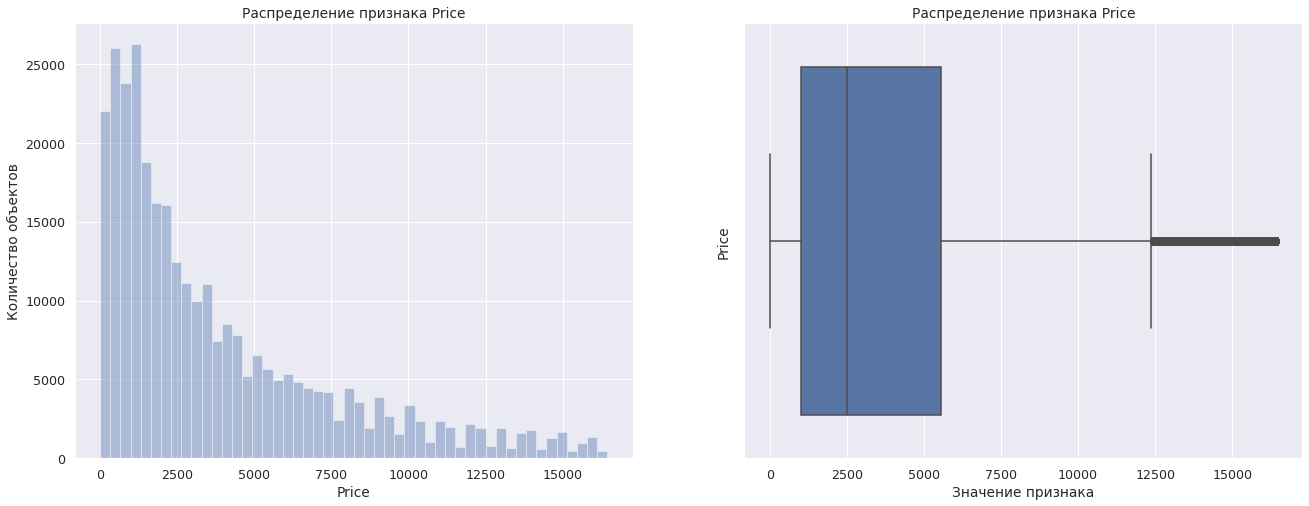

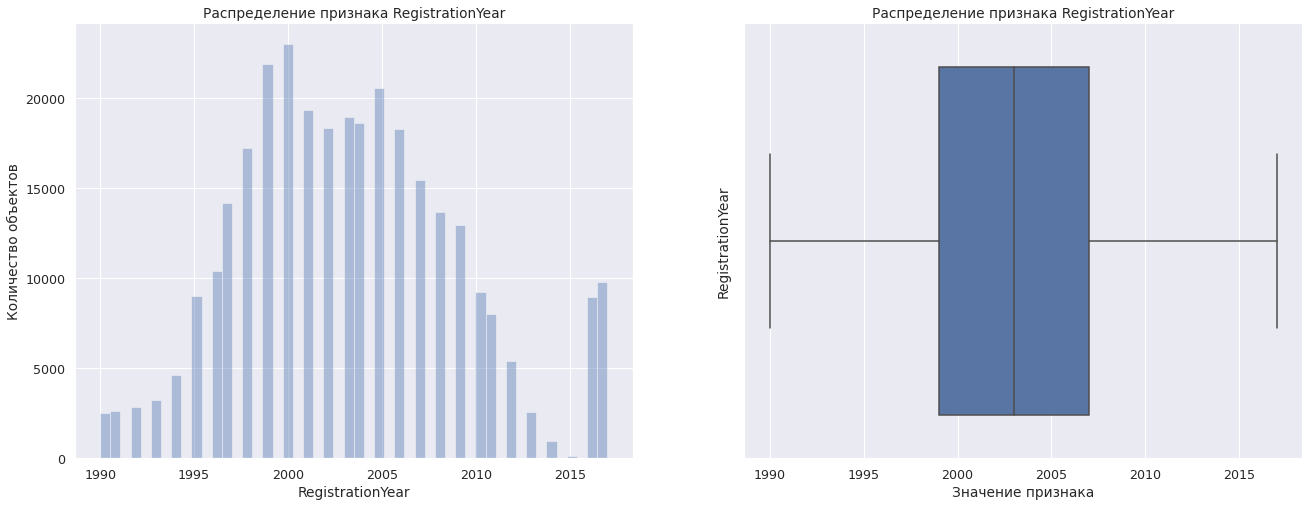

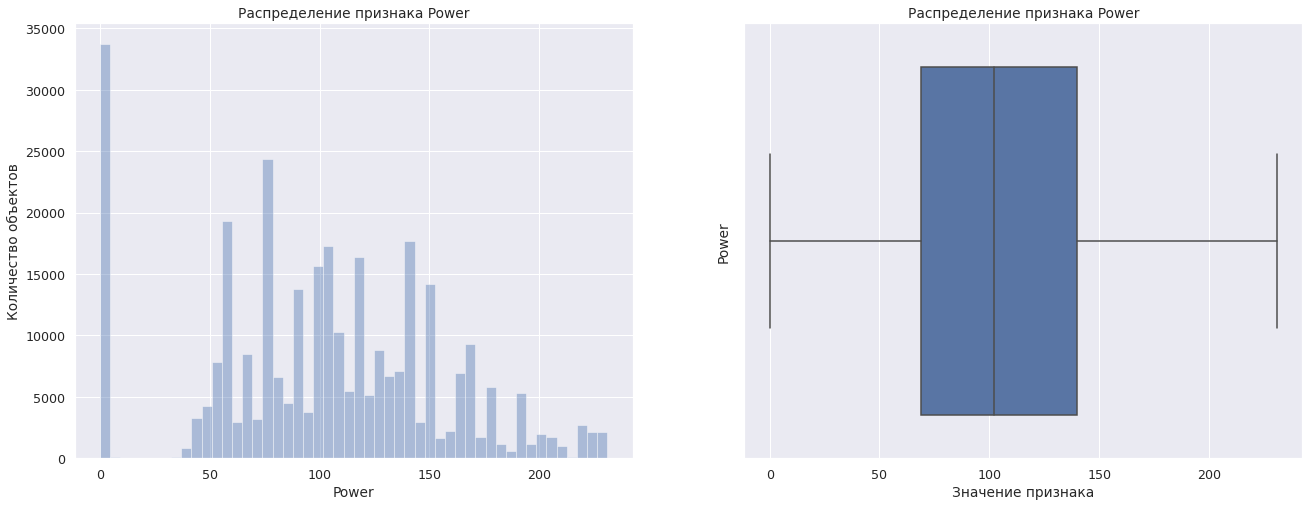

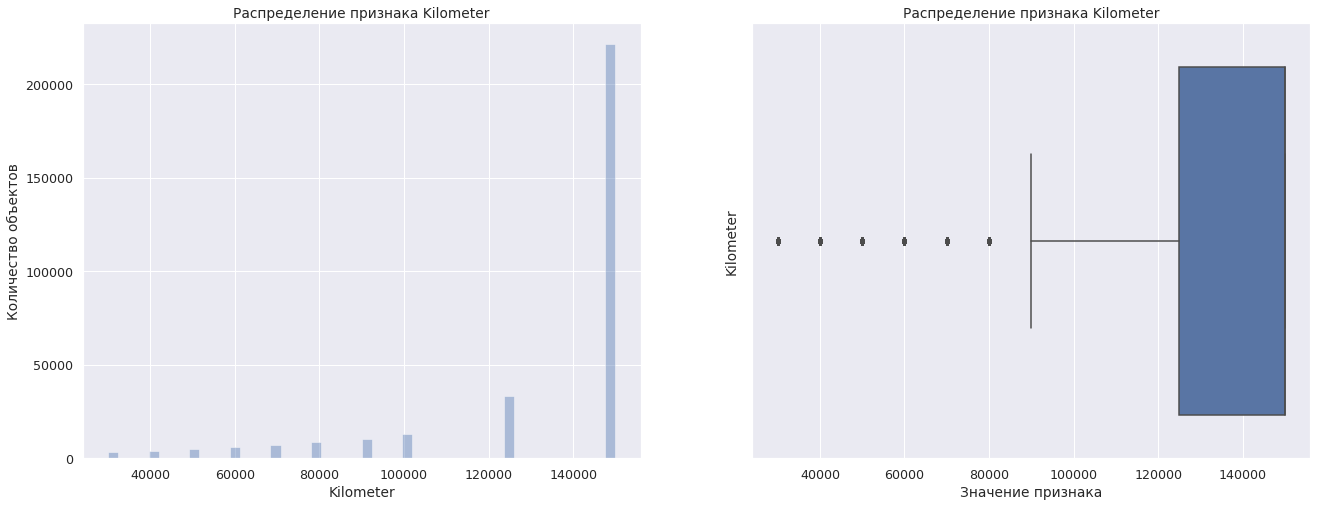

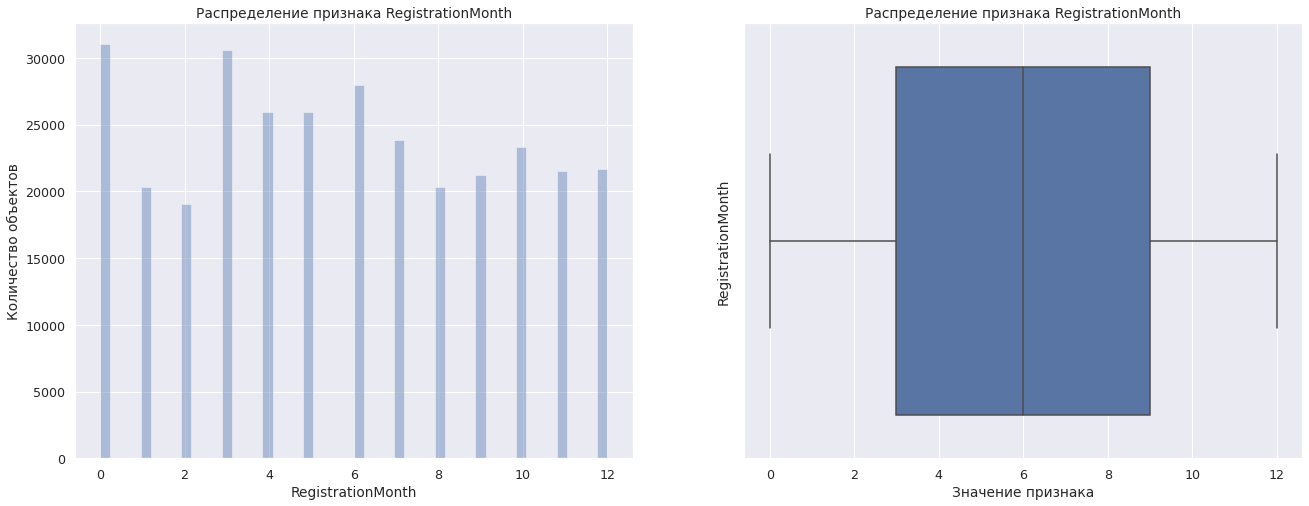

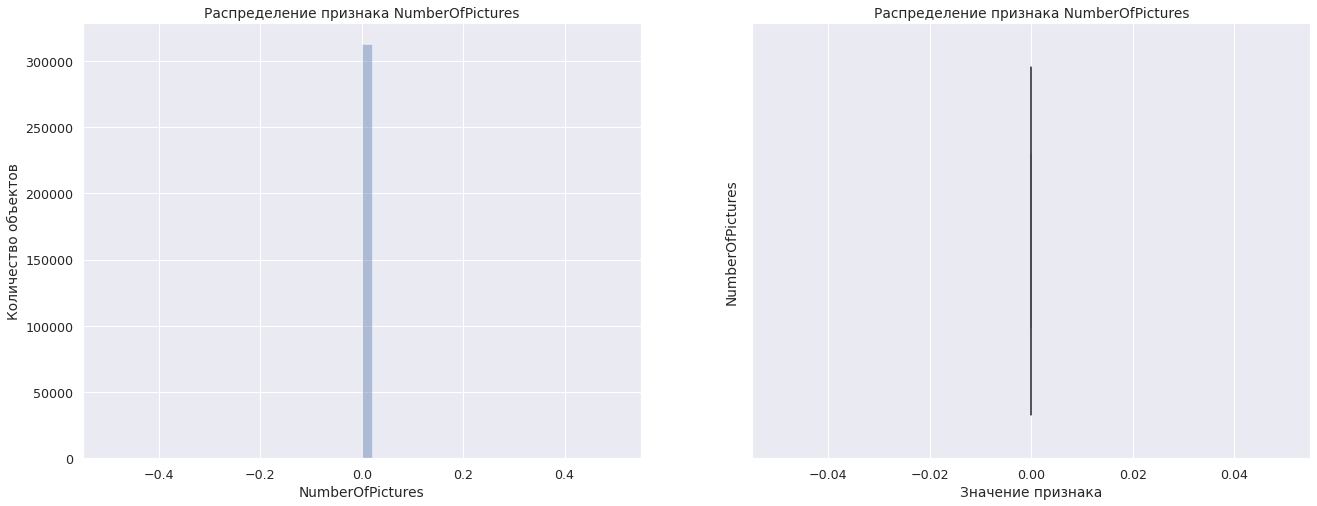

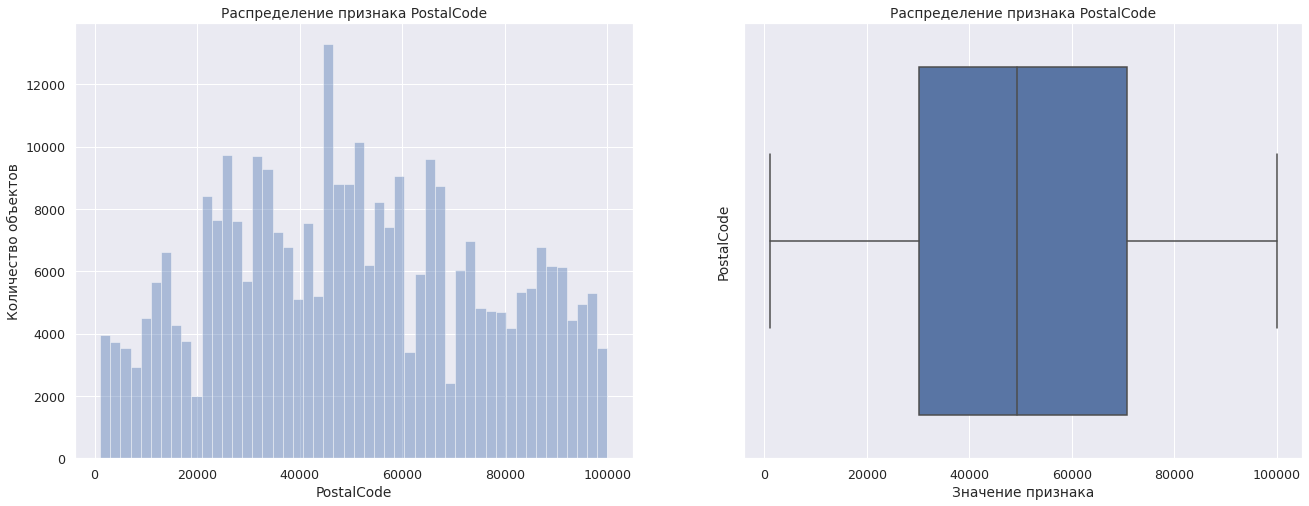

In [22]:
for col in num_cols:
    dist_and_box(auto_normal, col)

**Важный дисклеймер**: код в закоментированной колонке служит для очистки датафрейма от выбросов по методу отсечения значений, лежащих за пределами полуторного квартильного размаха. Так отсекается больше данных, но на распределениях в общем это сказывется незначительно, поэтому от данного метода я отказалась - но если ты сочтешь, что мой выбор был неверен, то могу перепроверить результаты исследования на датасете, очищенным этим способом.

In [23]:
# columns_with_outlayers = ['Price', 'RegistrationYear', 'Power', 'Kilometer']

# #задаем датафрейм для последующих фильтраций:
# auto_new = auto.copy()

# for column in columns_with_outlayers:
#     #отсекаем выбросы и сохраняем срез в переменную auto_normal:
#     auto_new = df_within_iqr(auto_new, column)

#auto_new.describe()

Посмотрим на распределения числовых признаков в датасете с аномалими и без них.

In [24]:
auto.describe()

Price  RegistrationYear          Power      Kilometer  \
count  354365.000000     354365.000000  354365.000000  354365.000000   
mean     4416.679830       2004.234481     110.093816  128211.363989   
std      4514.176349         90.228466     189.851330   37905.083858   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       RegistrationMonth  NumberOfPictures     PostalCode  
count      354365.000000          354365.0  354365.000000  
mean            5.714650               0.0   50508.503800  
std             3.726432               0.0   25783.100078  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.000000  
50%             6.000000               0.0   49413.000000  
75%             9.000000               0.0   71083.000000  
max            12.000000               0.0   99998.000000

In [25]:
auto_normal.describe()

Price  RegistrationYear          Power      Kilometer  \
count  312703.000000     312703.000000  312703.000000  312703.000000   
mean     3847.041004       2003.296163     101.572981  133303.965744   
std      3719.088291          5.942258      53.879625   30591.958652   
min         0.000000       1990.000000       0.000000   30000.000000   
25%      1000.000000       1999.000000      69.000000  125000.000000   
50%      2500.000000       2003.000000     102.000000  150000.000000   
75%      5555.000000       2007.000000     140.000000  150000.000000   
max     16450.000000       2017.000000     231.000000  150000.000000   

       RegistrationMonth  NumberOfPictures     PostalCode  
count      312703.000000          312703.0  312703.000000  
mean            5.761988               0.0   50445.785112  
std             3.710266               0.0   25731.874751  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30164.000000  
50%             6.000000               0.0   49377.000000  
75%             9.000000               0.0   70806.000000  
max            12.000000               0.0   99998.000000

**Выводы**

Была проделана работа по отсечению аномальных значений признаков, значения в которых были ниже 3х и выше 97го квантиля. Это помогло выровнять распределения и привести их к более нормализованному виду.

Однако, в датафрейме остались нулевые значения для колонок `Power`, `Price` и `RegistrationMonth`, а также пропуки в категориальных признаках, которые также нужно по-возможности устранить перед началом обучения моделей.

### Заполнение пропусков и нулевых значений.

In [26]:
# выведем количество пропусков по колонкам
auto_normal.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          29277
RegistrationYear         0
Gearbox              15543
Power                    0
Model                15114
Kilometer                0
RegistrationMonth        0
FuelType             26484
Brand                    0
Repaired             61069
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

В нашем датафрейме все еще содержится много пропусков и они находятся только в категориальных колонках.

Таким образом, по всей видимости, правдоподобно, не исказив распределение признаков и не выдумывая произвольные значения, восстановить пропуски у нас возможности нет. В связи с этим, мы можем закрыть пропуски некой заглушкой, чтобы они и не мешали в дальнейшем нашим моделям, и чтобы нам не пришлось удалять десятки тысяч записей из датафрейма. 

In [27]:
# выделяем названия колонок с пропусками
columns_with_nans = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Repaired']

# заполняем пропуски заглушкой
for col in columns_with_nans:
    auto_normal[col].fillna('unknown', inplace=True)
    
# проверяем правильность заполнения    
auto_normal.isnull().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

Теперь, когда у нас заполнены пропуски, мы можем избавиться от нулевых значений.

In [28]:
print('Количество строк с нулевым значение по признаку Power:', auto_normal.query('Power==0').shape[0])

Количество строк с нулевым значение по признаку Power: 33671


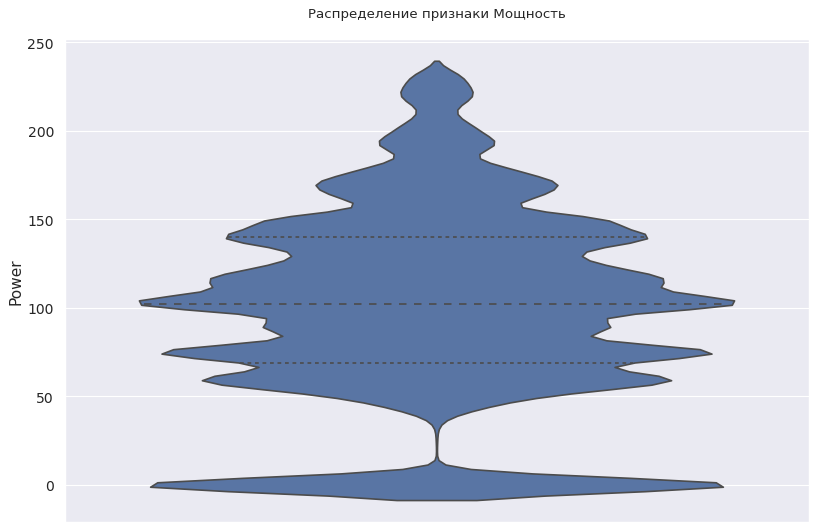

In [29]:
# построим скрипичный график

plt.figure(figsize=(12, 8), dpi=80)

sns.violinplot(y='Power', data=auto_normal, scale='width', inner='quartile', grid=True)
plt.title('Распределение признаки Мощность\n', fontsize=12)
plt.show()

Здесь хорошо виден узкий перешеек в районе значений 10-30, который разделяет числовые и нулевые значения. Попробуем заполнить нулевые значения медианными по параметру Модели, так как мощность машин одинаковых моделей так же не должна различаться.

In [30]:
def filling_median_group(data, column, group):
    '''функция для заполнения пропусков столбца датафрейма медианой, сгруппированной по столбцу 
       column - столбец с пропусками, 
       group - столбец для группировки
    '''
    
    print(f'количество нулевых значений в {column} до изменений: ', (data[column] == 0).sum())
    for value in data[group].unique():
    
        median_col_group = data.loc[data[group]==value, column].median()
        data.loc[((data[column] == 0)) & (data[group]==value), column] = round(median_col_group)
    print(f'количество нулевых значений {column} после изменений: ', (data[column] == 0).sum())    

In [31]:
filling_median_group(auto_normal, 'Power', 'Model')

количество нулевых значений в Power до изменений:  33671
количество нулевых значений Power после изменений:  80


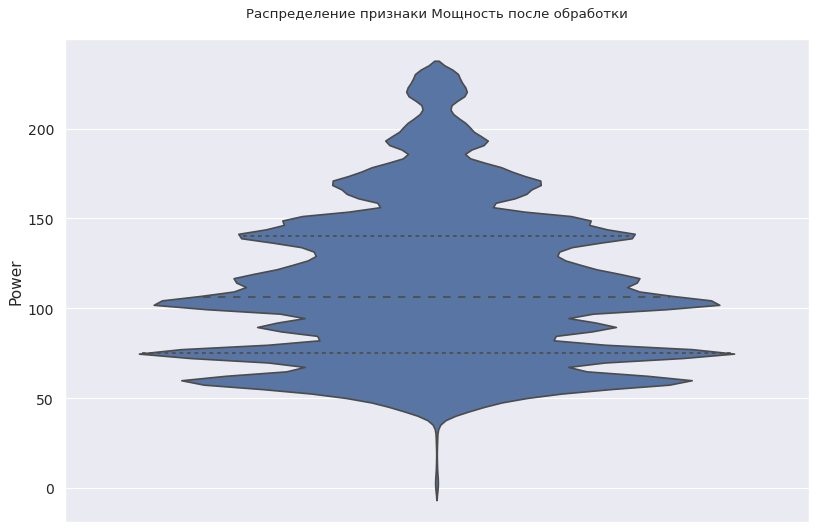

In [32]:
# построим скрипичный график

plt.figure(figsize=(12, 8), dpi=80)

sns.violinplot(y='Power', data=auto_normal, scale='width', inner='quartile', grid=True)
plt.title('Распределение признаки Мощность после обработки\n', fontsize=12)
plt.show()

Как видим, в результате преобразования распределение признака не сильно изменилось, значит, преобразование было проведено корректо. Осталось 80 строк с нулевыми значениями, их мы можем просто отсечь.

In [33]:
auto_normal = auto_normal[auto_normal['Power'] != 0]

In [34]:
print('Количество строк с нулевым значение по признаку Price:', auto_normal.query('Price==0').shape[0])

Количество строк с нулевым значение по признаку Price: 8571


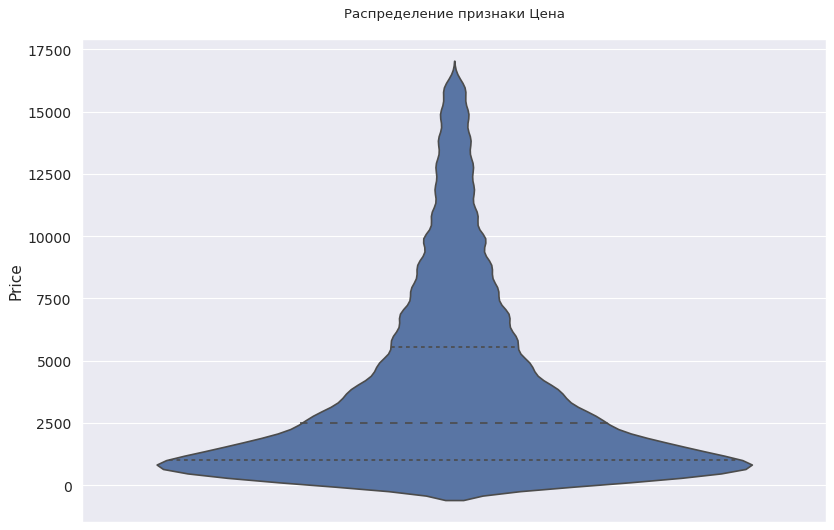

In [35]:
# построим скрипичный график

plt.figure(figsize=(12, 8), dpi=80)

sns.violinplot(y='Price', data=auto_normal, scale='width', inner='quartile', grid=True)
plt.title('Распределение признаки Цена\n', fontsize=12)
plt.show()

Так как цена является целевой переменной и нулевые значения содержат 8571 строк, то сложно говорить о том, является ли это аномалией. Предлагаю оставить этот признак как есть.

In [36]:
print('Количество строк с нулевым значение по признаку RegistrationMonth:', auto_normal.query('RegistrationMonth==0').shape[0])

Количество строк с нулевым значение по признаку RegistrationMonth: 30993


В датафрейме содержится множество строк с указанием нулевого месяца в дате регистрации автомобиля, причем таких записей десятки тысяч, то есть удаление приведет к потере большого количества данных. Признак `RegistrationMonth` распределен равномерно, из чего я делаю вывод, что нулевые значения мы можем заменить медианными, не сильно исказив распределение.

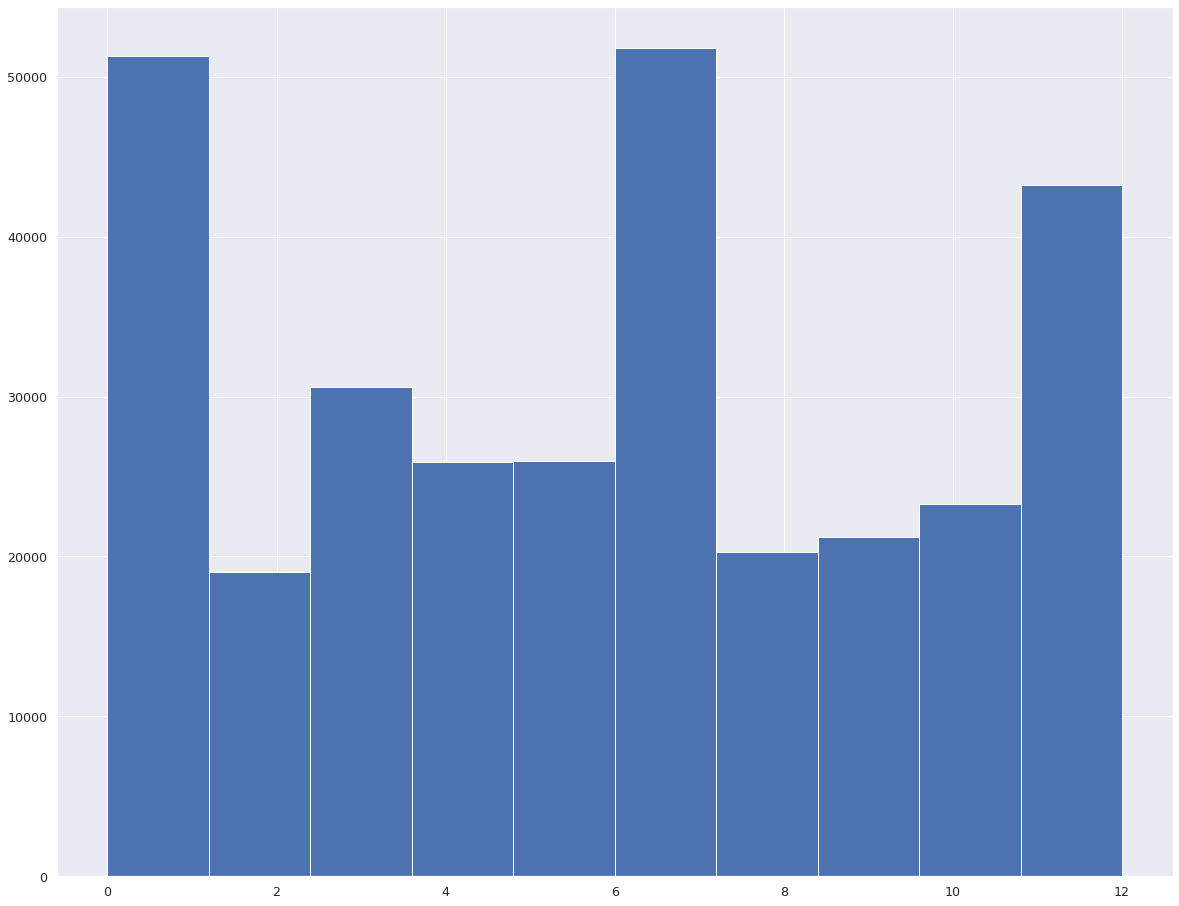

In [37]:
# распределение до замены
auto_normal['RegistrationMonth'].hist();

In [38]:
auto_normal['RegistrationMonth'].replace(0, auto_normal['RegistrationMonth'].median(), inplace=True)

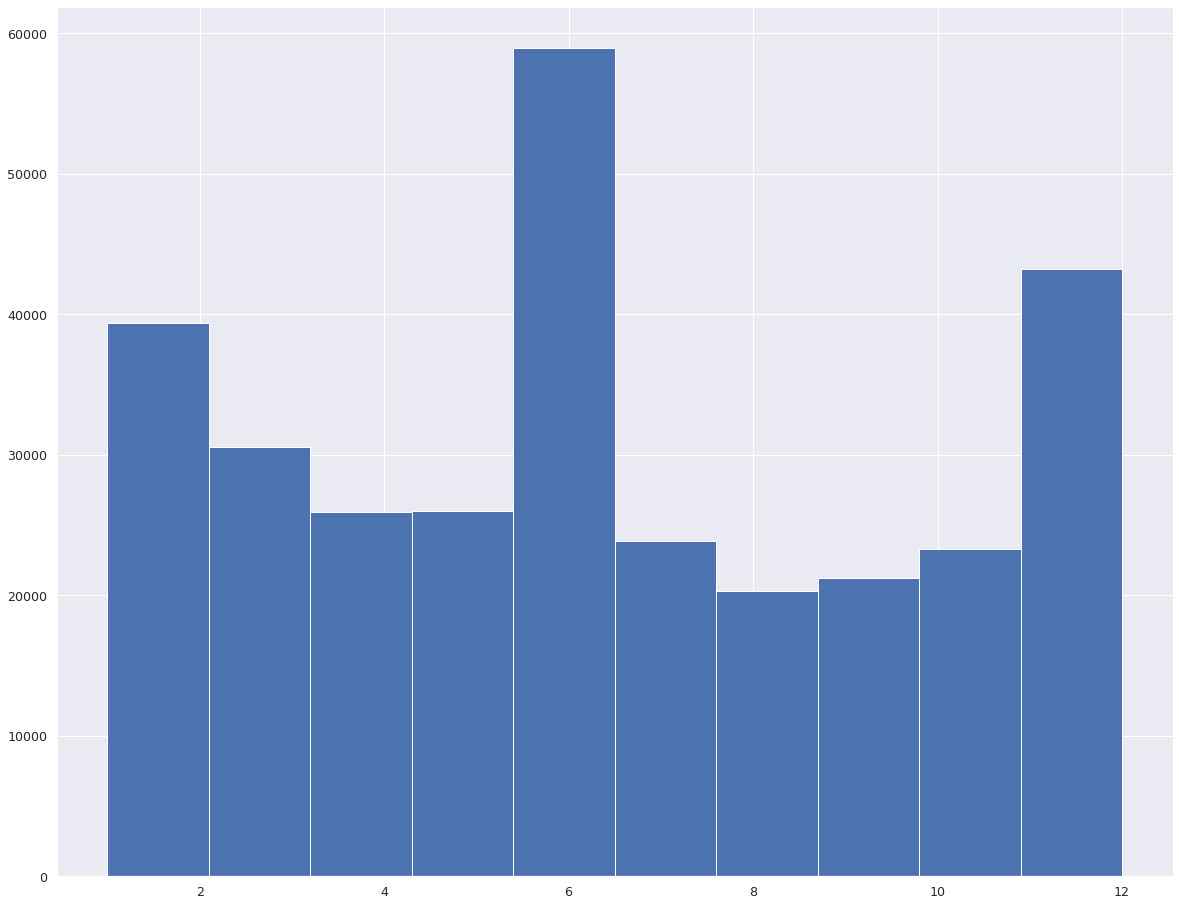

In [39]:
# распределение после замены нулевых значений
auto_normal['RegistrationMonth'].hist();

Мы можем извлечь из колонок `DateCreated` (дата создания анкеты) и `LastSeen` (дата последней активности пользователя) информацию о том, сколько дней пользователь был активен, этот признак может быть существенным для наших моделей. 

In [40]:
auto_normal['DaysActive'] = (auto_normal['LastSeen'] - auto_normal['DateCreated']).dt.days

In [41]:
auto_normal.head()

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0 2016-03-24 11:52:17    480     unknown              1993  manual     90   
2 2016-03-14 12:52:21   9800         suv              2004    auto    163   
3 2016-03-17 16:54:04   1500       small              2001  manual     75   
4 2016-03-31 17:25:20   3600       small              2008  manual     69   
5 2016-04-04 17:36:23    650       sedan              1995  manual    102   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                6.0    petrol  volkswagen  unknown   
2  grand     125000                8.0  gasoline        jeep  unknown   
3   golf     150000                6.0    petrol  volkswagen       no   
4  fabia      90000                7.0  gasoline       skoda       no   
5    3er     150000               10.0    petrol         bmw      yes   

  DateCreated  NumberOfPictures  PostalCode            LastSeen  DaysActive  
0  2016-03-24                 0       70435 2016-04-07 03:16:57          14  
2  2016-03-14                 0       90480 2016-04-05 12:47:46          22  
3  2016-03-17                 0       91074 2016-03-17 17:40:17           0  
4  2016-03-31                 0       60437 2016-04-06 10:17:21           6  
5  2016-04-04                 0       33775 2016-04-06 19:17:07           2

Теперь, когда мы избавились от выбросов, посмотрели распределение признаков и создали новую колонку, становится очевидно, что колонки c различными датами, количеством фотографий автомобиля и почтовым индексом владельца не несут никакой полезной информации, поэтому их стоит удалить.

In [41]:
auto_normal.drop(columns=['DateCreated', 'DateCrawled', 'NumberOfPictures', 'PostalCode', 'LastSeen'], inplace=True)

**Выводы**

- Пропуски в категориальных фичах были заполнены заглушкой дл того, чтобы не исказить значения датафрейма и не удалять тысячи записей.
- Пропусков в числовых признаках у нас не было, однако, в них были замечены многочисленные аномалии (удаленные ранее) и нулевые значения, которые могли помешать прогнозам наших моделей, поэтому такие случаи были рассмотрены и устранены таким образом, чтобы не исказить распределения признаков.
- Была введена новая фича - количество дней активности пользователя, как более информативный вариант двух колонок с датами создания анкеты и последней активности пользователя.
- Колонки, содержащие неинформативные или избыточные признаки были удалены, во избежание переобучения и ухудшения прогностических качеств наших моделей.

### Проверка корреляций между фичами.

Теперь оценим корреляцию различных признаков друг с другом.

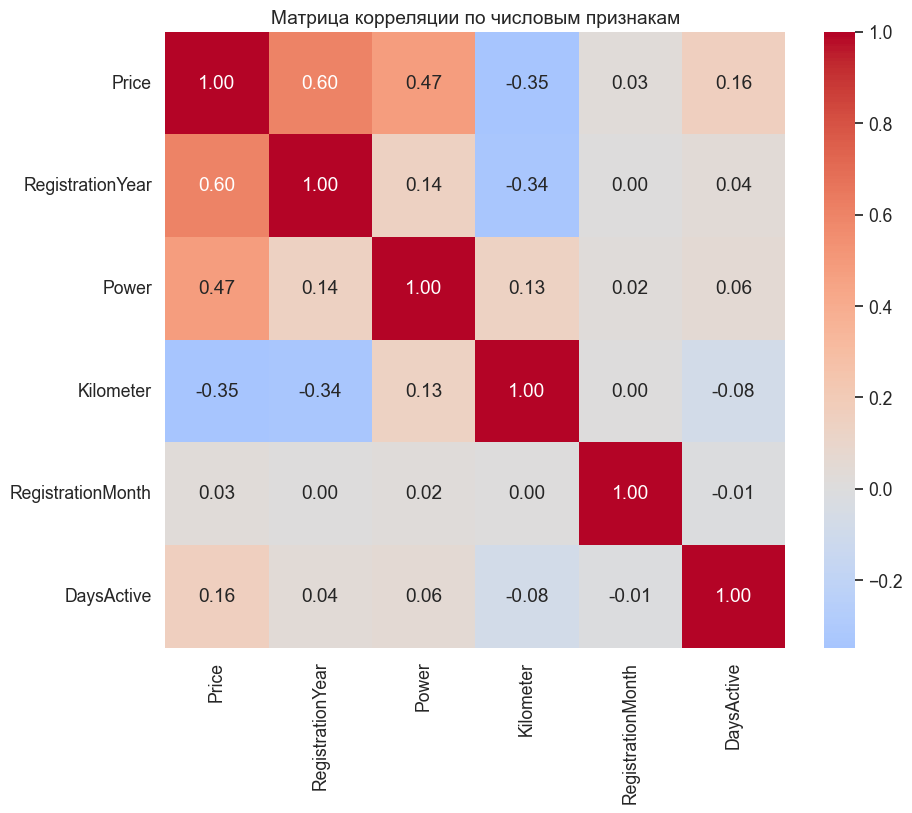

In [42]:
plt.figure(figsize=(10,8))
plt.title('Матрица корреляции по числовым признакам')

sns.heatmap(auto_normal.corr(method='spearman'), 
            annot=True, 
            fmt='.2f',
            center=0,
            cmap='coolwarm');

Сильной мультиколлениарности между числовыми признаками не обнаружено. Наибольшая корелляция выявлена у цены с датой регистрации и мощностью, веротно, эти признаки будут важны и при построении моделей.Также есть отрицательная корреляции показателя цены с пробегом, но она довольно слабая.

Так как коэффициент корреляции Спирмана не позволяет нам оценить взаимосвязи, учитывая при этом категориальные признаки, то также попробуем визуализировать корреляции с помощью коэффициента Phik.

interval columns not set, guessing: ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'DaysActive']


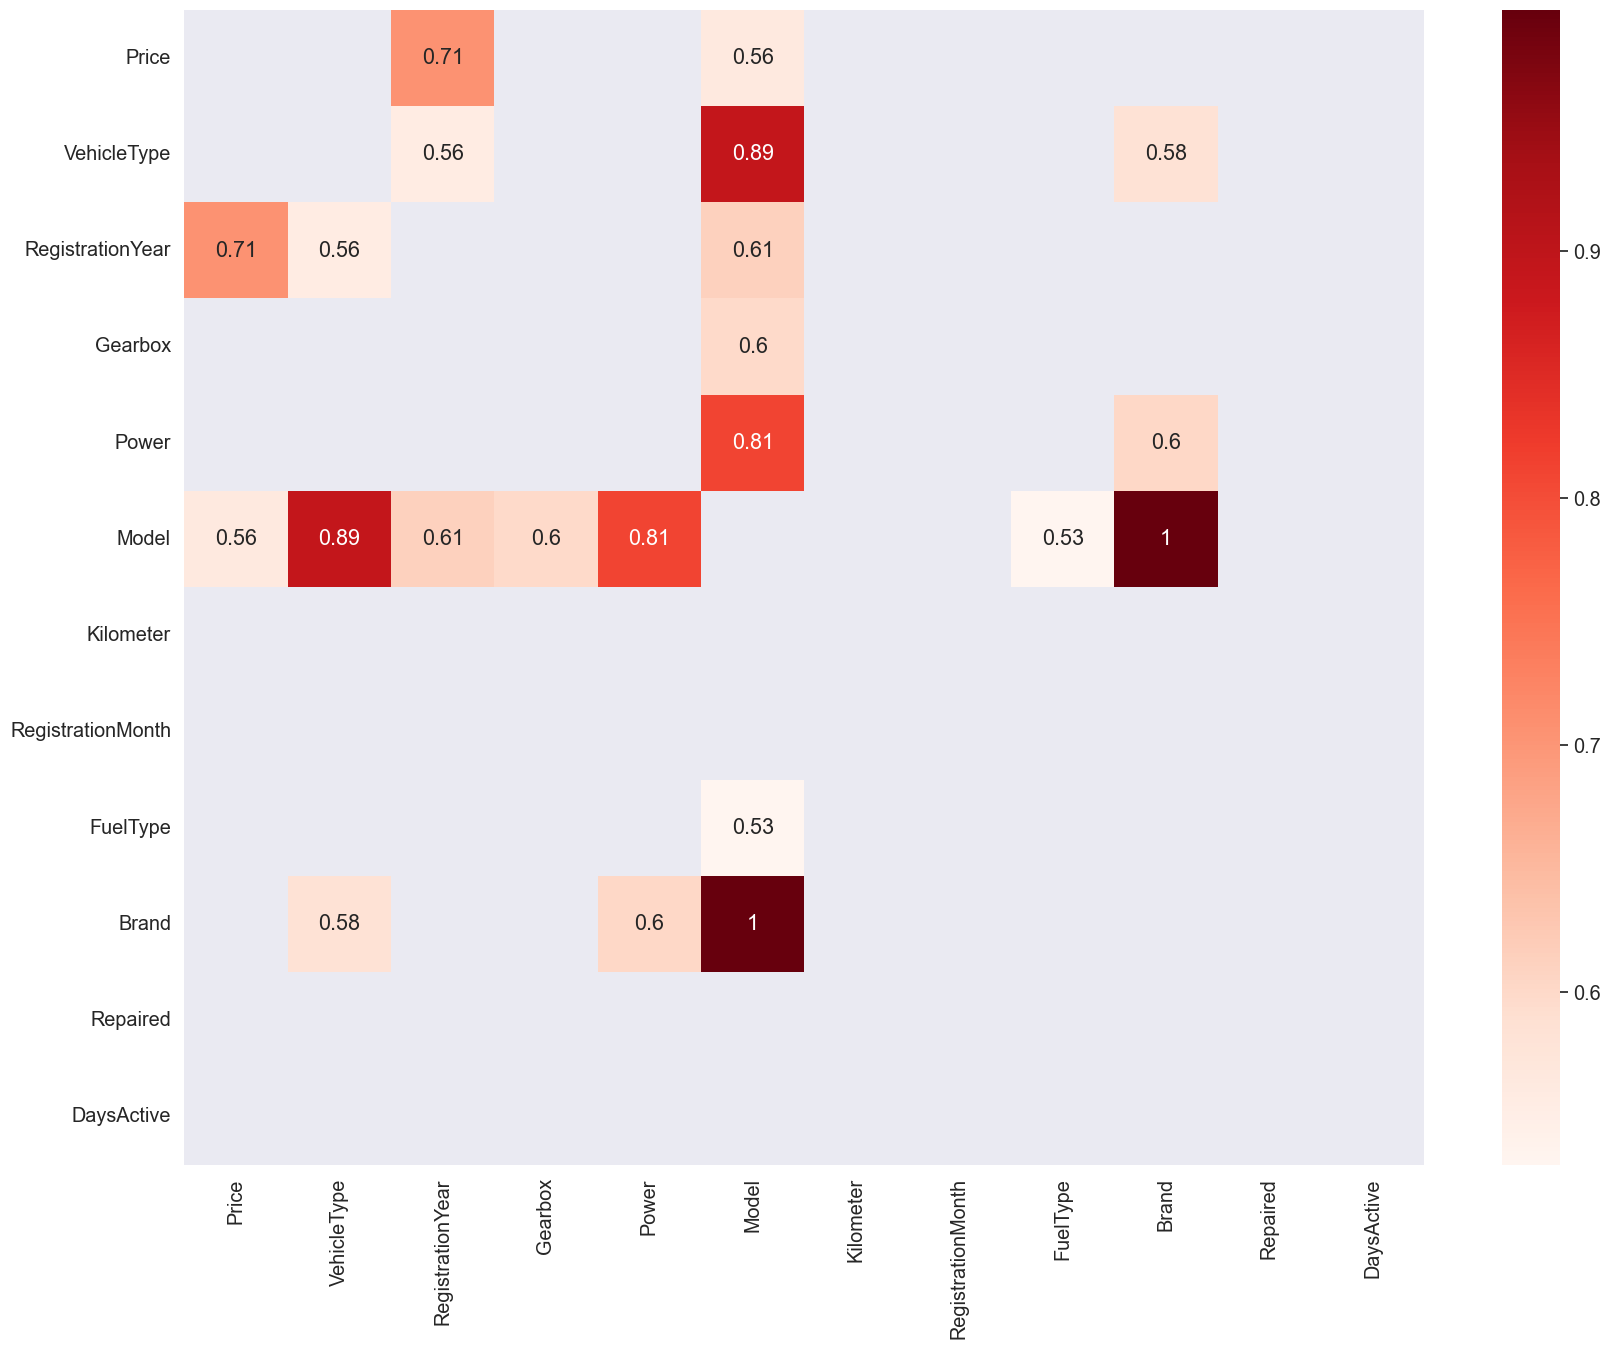

In [43]:
dfCorr = auto_normal.phik_matrix()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr != 1.0000)]
plt.figure(figsize=(20, 15))
sns.set(font_scale = 1.3)
sns.heatmap(filteredDf, annot=True, cmap="Reds");

**Выводы**

Наблюдается сильная взаимосвязь признака `Model`с признаком `Brand`, что в целом логично, так как в нашем датасете представлено конечное число брендов и модели довольно однозначно определяются брендом производителя.


Признак `VehicleType` также сильно коррелярует с моделью, так как тип кузова является неотъемлемой технической характеристикой определенной модели.


Целевой признак `Price` довольно сильно коррелирует только с датой регистрации, что опять же подтвержает наши выводы о том, что этот признак будет играть значительную роль для построения наших моделей.

### Выводы по разделу

Нами был проведен полный цикл предобработки сырых данных до приведения их к виду, пригодному для подачи в модели машинного обучения.

- Изучены данные и их основные характеристики, общая информация о датасете, выявлены аномалии, пропуски и явные дубликаты;
- Рассмотрены и визуализированы распределения числовых признаков, изучена зависимость целевого признака от значений категориальных фичей;
- Отсечены аномалии в признаках по значению квантилей, заполнены пропуски и нулевые значения;
- Добавлен новых столбец с количеством дней активности пользовател, неинформативные столбцы удалены из датасета;
- Изучена корреляци между признаками на предмет проблемы мультиколлинерности, мультиколлениарности между числовыми признаками не обнаружено.

## Обучение моделей

**Задачи**

- Подготовить выборки для обучения моделей;
- Обучить разные модели, одна из которых — LightGBM, как минимум одна — не бустинг;
- Для каждой модели попробовать разные гиперпараметры;
- Для оценки качества моделей применять метрику RMSE;
- Для дальнейшего анализа лучшей модели собирать не только метрику качества, но и время обучения и время предсказания моделей, так как эта информация интересна заказчику.

Снова посмотрим на наш датасет, чтобы оценить оставшиеся фичи и отсутствие пропусков.

In [44]:
auto_normal.head()

Price VehicleType  RegistrationYear Gearbox  Power  Model  Kilometer  \
0    480     unknown              1993  manual     90   golf     150000   
2   9800         suv              2004    auto    163  grand     125000   
3   1500       small              2001  manual     75   golf     150000   
4   3600       small              2008  manual     69  fabia      90000   
5    650       sedan              1995  manual    102    3er     150000   

   RegistrationMonth  FuelType       Brand Repaired  DaysActive  
0                  6    petrol  volkswagen  unknown          14  
2                  8  gasoline        jeep  unknown          22  
3                  6    petrol  volkswagen       no           0  
4                  7  gasoline       skoda       no           6  
5                 10    petrol         bmw      yes           2

In [45]:
auto_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312623 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              312623 non-null  int64 
 1   VehicleType        312623 non-null  object
 2   RegistrationYear   312623 non-null  int64 
 3   Gearbox            312623 non-null  object
 4   Power              312623 non-null  int64 
 5   Model              312623 non-null  object
 6   Kilometer          312623 non-null  int64 
 7   RegistrationMonth  312623 non-null  int64 
 8   FuelType           312623 non-null  object
 9   Brand              312623 non-null  object
 10  Repaired           312623 non-null  object
 11  DaysActive         312623 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 31.0+ MB


### Подготовка данных для подачи в модели и вспомогательных функций.

Проведем предварительную подготовку датасета для подачи его в модели.

In [46]:
# отделим признаки от таргета

features = auto_normal.drop(['Price'], axis = 1)
target = auto_normal['Price']

In [47]:
# выделим отдельно категориальные и числовые признаки

cat_cols = features.select_dtypes(include=['object']).columns.tolist()
num_cols = features.select_dtypes(include=['int']).columns.tolist()

In [48]:
# категориальные признаки 
cat_cols

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

In [49]:
# числовые признаки
num_cols

['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'DaysActive']

Отделим тестовую выборку, которую покажем в самом конце только наиболее успешной модели.

In [50]:
features_tv, features_test, target_tv, target_test = train_test_split(features,
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=RANDOM)

Отделим выборку для валидации моделей в процессе подбора оптимальной.

In [51]:
features_train, features_val, target_train, target_val = train_test_split(features_tv,
                                                                            target_tv, 
                                                                            test_size=0.25, 
                                                                            random_state=RANDOM)

In [52]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((175850, 11), (78156, 11), (175850,), (78156,))

Теперь наши выборки разделены таким образом, что мы можем обучать модель и валидировать ее, а тестовые данные полностью отложены во избежание утечки данных.

Напишем вспомогательную функцию, которая будет возвращать метрику RMSE, так как встроенной в пакет sklearn ее нет, а внутренняя валидация по ней доступна только для бустингов.

С этой же целью сразу зададим scorer, который поможет нам оценивать результаты перебора параметров по сетке также по RMSE.

In [151]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5

# прописываем функцию, которая будет оценивать модели по нашей метрике RMSE
rmse_scorer = make_scorer(rmse, greater_is_better=False)

Введем вспомогательные списки для занесения в них интересующих нас параметров ,чтобы в дальнейшем можно было обращатьс в ним напрямую по индексам в случае необходимости.

In [54]:
names = []
rmse_scores = []
fit_times = []
predict_times = []

Напишем функцию, которая поможет нам получать и обрабатывать метрики, не копируя каждый раз большие куски кода, также введем в них функционал занесения этих метрики в датафрейм.

In [56]:
def get_metrics(model, name):
    '''функция возвращает метрики и добавляет их в список'''
    
    df_metrics = pd.DataFrame()
    
    # время обучения модели
    fit_start_time = time()  
    model.fit(features_train,
                 target_train,
                 eval_set=eval_set,
                 verbose=1)
    fit_time = time() - fit_start_time
    
    # время предсказания модели
    predict_start_time = time()  
    y_pred = model.predict(features_val)
    pred_time = time() - predict_start_time
    
    # значение метрики
    model_rmse = rmse(target_val, y_pred)
    
    df_metrics['Модель'] = [name]
    df_metrics['Время обучения, сек'] = round(fit_time, 4)
    df_metrics['Время предсказания, сек'] = round(pred_time, 4)
    df_metrics['RMSE'] = model_rmse
    
    names.append(name)
    rmse_scores.append(model_rmse)
    fit_times.append(fit_time)
    predict_times.append(pred_time)
    
    #print(f'Время обучения: {fit_time:.4f} сек., время предсказания: {pred_time:.4f} сек.')
    #print(f'Метрика RMSE для модели {name}: {model_rmse}')
    
    return df_metrics

Для начала обучим бустинг модели CatBoost и LGBMBoost, так как для них не требуется явное преобразование категориальных признаков - у них есть свои внутренние методы кодировки. А затем уже будем пробовать модели, для которых требуется явное преобразование категориальных фичей с помощью энкодеров. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо

</div>

### CatBoostRegressor без подбора гиперпараметров.

In [55]:
cat_baseline = CatBoostRegressor(random_state=RANDOM, 
                                 cat_features=cat_cols,
                                 loss_function='RMSE',
                                 eval_metric='RMSE')

eval_set = (features_val, target_val)

Обучим модель со стандартными гиперпараметрами, посчитаем результат метрики RMSE.

In [57]:
metrics = get_metrics(cat_baseline, 'CatBoost_baseline')

Learning rate set to 0.114652
0:	learn: 3447.6759716	test: 3449.3916637	best: 3449.3916637 (0)	total: 230ms	remaining: 3m 50s
1:	learn: 3211.9060037	test: 3216.0999364	best: 3216.0999364 (1)	total: 307ms	remaining: 2m 33s
2:	learn: 3010.0847742	test: 3017.1206884	best: 3017.1206884 (2)	total: 378ms	remaining: 2m 5s
3:	learn: 2835.3722375	test: 2845.0673339	best: 2845.0673339 (3)	total: 449ms	remaining: 1m 51s
4:	learn: 2678.6481765	test: 2689.9680576	best: 2689.9680576 (4)	total: 513ms	remaining: 1m 42s
5:	learn: 2537.2916683	test: 2550.2474652	best: 2550.2474652 (5)	total: 581ms	remaining: 1m 36s
6:	learn: 2412.0341604	test: 2427.3524108	best: 2427.3524108 (6)	total: 651ms	remaining: 1m 32s
7:	learn: 2310.0264938	test: 2326.6552219	best: 2326.6552219 (7)	total: 719ms	remaining: 1m 29s
8:	learn: 2226.2326143	test: 2244.6973864	best: 2244.6973864 (8)	total: 787ms	remaining: 1m 26s
9:	learn: 2149.7722107	test: 2169.1881911	best: 2169.1881911 (9)	total: 859ms	remaining: 1m 25s
10:	learn: 

In [58]:
metrics

Модель  Время обучения, сек  Время предсказания, сек  \
0  CatBoost_baseline              68.3546                   0.1256   

          RMSE  
0  1404.420295

### LGBMRegressor без подбора гиперпараметров.

In [59]:
lgbm_baseline = LGBMRegressor(random_state=RANDOM, metric='rmse')

Для этой модели нужно в явном виде привести категориальные колонки к типу `category`.

In [60]:
features_train[cat_cols] = features_train[cat_cols].astype('category')
features_val[cat_cols] = features_val[cat_cols].astype('category')

In [61]:
metrics = metrics.append(get_metrics(lgbm_baseline, 'LGBM_baseline'))

[1]	valid_0's rmse: 3457.75
[2]	valid_0's rmse: 3229.1
[3]	valid_0's rmse: 3024.73
[4]	valid_0's rmse: 2842.79
[5]	valid_0's rmse: 2681.35
[6]	valid_0's rmse: 2540.63
[7]	valid_0's rmse: 2415.69
[8]	valid_0's rmse: 2307.62
[9]	valid_0's rmse: 2212.53
[10]	valid_0's rmse: 2126.16
[11]	valid_0's rmse: 2048.51
[12]	valid_0's rmse: 1982.68
[13]	valid_0's rmse: 1922.7
[14]	valid_0's rmse: 1872.62
[15]	valid_0's rmse: 1826.53
[16]	valid_0's rmse: 1785.21
[17]	valid_0's rmse: 1750.28
[18]	valid_0's rmse: 1718.24
[19]	valid_0's rmse: 1691.96
[20]	valid_0's rmse: 1666.14
[21]	valid_0's rmse: 1645.72
[22]	valid_0's rmse: 1626.19
[23]	valid_0's rmse: 1608.56
[24]	valid_0's rmse: 1593.04
[25]	valid_0's rmse: 1578.61
[26]	valid_0's rmse: 1566.65
[27]	valid_0's rmse: 1556.64
[28]	valid_0's rmse: 1546.47
[29]	valid_0's rmse: 1538.25
[30]	valid_0's rmse: 1530.21
[31]	valid_0's rmse: 1522.57
[32]	valid_0's rmse: 1517.1
[33]	valid_0's rmse: 1510.86
[34]	valid_0's rmse: 1505.94
[35]	valid_0's rmse: 1500.

In [62]:
metrics

Модель  Время обучения, сек  Время предсказания, сек  \
0  CatBoost_baseline              68.3546                   0.1256   
0      LGBM_baseline               0.4220                   0.0380   

          RMSE  
0  1404.420295  
0  1424.774998

### LGBMRegressor с подбором гиперпараметров через Optuna.

In [63]:
def objective_lgbm(trial, features=features, target=target, n_folds=5, random_state=RANDOM):
    
    # передаем список перебираемых гиперпараметров
    lgb_params = {
        
        'random_state': trial.suggest_categorical('random_state', [random_state]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300]),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'num_leaves' : trial.suggest_int('num_leaves', 20, 150, step=1),
        'max_depth': trial.suggest_int('max_depth', 10, 100, step=10),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 10, 1000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5, 0.6, 0.7, 0.8, 1.0])        
    }
    
    # оценка проводится через кросс-валидацию
    cv = KFold(n_splits=n_folds, 
               random_state=random_state,
               shuffle=True)
    
    cv_rmse = np.empty(n_folds)

    for idx, (train_idx, val_idx) in enumerate(cv.split(features, target)):
        features_train, features_val = features.iloc[train_idx], features.iloc[val_idx]
        target_train, target_val = target.iloc[train_idx], target.iloc[val_idx]
        
        features_train[cat_cols] = features_train[cat_cols].astype('category')
        features_val[cat_cols] = features_val[cat_cols].astype('category')
        
        # задаем модель с параметрами
        model = LGBMRegressor(**lgb_params)
    
        # модель учится
        model.fit(features_train,
                  target_train,
                  eval_set=[(features_val, target_val)],
                  eval_metric='rmse',
                  early_stopping_rounds=100,
                  verbose=False)
        
        # модель делает предсказания
        preds = model.predict(features_val)
        
        # добавляется RMSE 
        cv_rmse[idx] = mean_squared_error(target_val, preds) ** 0.5
    
    return np.mean(cv_rmse)

In [64]:
study_lgbm = optuna.create_study(direction='minimize', study_name='LGBM')
study_lgbm.optimize(objective_lgbm, 
                    n_trials=50, 
                    show_progress_bar=True)

[I 2023-03-10 17:51:27,587] A new study created in memory with name: LGBM


  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[I 2023-03-10 17:51:41,834] Trial 0 finished with value: 2998.705163113427 and parameters: {'random_state': 12345, 'n_estimators': 300, 'learning_rate': 0.0012052418861036673, 'num_leaves': 136, 'max_depth': 50, 'min_data_in_leaf': 250, 'reg_alpha': 0.0046631599708027325, 'reg_lambda': 44.090457253858006, 'colsample_bytree': 0.5, 'subsample': 0.4}. Best is trial 0 with value: 2

In [65]:
print(f'Параметры лучшей модели по результатам испытаний:\n\n {study_lgbm.best_params}')

Параметры лучшей модели по результатам испытаний:

 {'random_state': 12345, 'n_estimators': 300, 'learning_rate': 0.12322434556227625, 'num_leaves': 150, 'max_depth': 80, 'min_data_in_leaf': 249, 'reg_alpha': 0.003272100350533061, 'reg_lambda': 0.009923673396496399, 'colsample_bytree': 0.7, 'subsample': 0.4}


Визуализируем важность перебираемых гиперпараметров для получения оптимальной оценки.

**Важный дисклеймер**

При загрузке терадки у меня куда-то пропал этот тип графиков! Знаю по опыту, что такая проблема может быть связана с Jupyter, можно попробовать открыть в VSCode, там интерактивные обычно отображаются.

In [66]:
optuna.visualization.plot_param_importances(study_lgbm)

Как видим, из всех перебираемых гиперпараметров для наших моделей ниболее критичным был шаг обучения (learning_rate), что не удивительно, так как при большой величине шага мы рискуем не попасть в минимум функции, а при слишком маленьком очень долго учиться. Некоторое влияние оказывают пропорция количества колонок на рандомной подвыборке, пропорция рандомных семплов для каждого дерева и регуляризационные коэффициенты.

Теперь обучим модель с наилучшими гиперпараметрами и получим все необходимые метрики.

In [67]:
lgbm_optuna = LGBMRegressor(**study_lgbm.best_params, metric='rmse')

In [68]:
metrics = metrics.append(get_metrics(lgbm_optuna, 'LGBM_Optuna'))

[LightGBM] [Warning] min_data_in_leaf is set=249, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=249
[1]	valid_0's rmse: 3378.38
[2]	valid_0's rmse: 3084.63
[3]	valid_0's rmse: 2904.26
[4]	valid_0's rmse: 2668.88
[5]	valid_0's rmse: 2475.49
[6]	valid_0's rmse: 2303.51
[7]	valid_0's rmse: 2157.46
[8]	valid_0's rmse: 2032.88
[9]	valid_0's rmse: 1936.4
[10]	valid_0's rmse: 1855.92
[11]	valid_0's rmse: 1782.98
[12]	valid_0's rmse: 1728.62
[13]	valid_0's rmse: 1679.06
[14]	valid_0's rmse: 1638.19
[15]	valid_0's rmse: 1601.41
[16]	valid_0's rmse: 1571.45
[17]	valid_0's rmse: 1548.49
[18]	valid_0's rmse: 1527.5
[19]	valid_0's rmse: 1511.98
[20]	valid_0's rmse: 1497.19
[21]	valid_0's rmse: 1484.67
[22]	valid_0's rmse: 1474.79
[23]	valid_0's rmse: 1466.69
[24]	valid_0's rmse: 1458.2
[25]	valid_0's rmse: 1451.97
[26]	valid_0's rmse: 1445.78
[27]	valid_0's rmse: 1440.41
[28]	valid_0's rmse: 1435.94
[29]	valid_0's rmse: 1432.48
[30]	valid_0's rmse: 1429.25
[31]	valid_0's rms

In [69]:
metrics

Модель  Время обучения, сек  Время предсказания, сек  \
0  CatBoost_baseline              68.3546                   0.1256   
0      LGBM_baseline               0.4220                   0.0380   
0        LGBM_Optuna               2.2463                   0.2650   

          RMSE  
0  1404.420295  
0  1424.774998  
0  1364.361654

### CatBoostRegressor с подбором гиперпараметров через Optuna.

In [73]:
def objective_cat(trial, features=features, target=target, n_folds=5, random_state=RANDOM, cat_features=cat_cols):
    
    # передаем список перебираемых гиперпараметров
    cat_params = {
        
        'random_state': trial.suggest_categorical('random_state', [random_state]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300]),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'loss_function': trial.suggest_categorical('loss_function', ['RMSE']),
        'eval_metric': trial.suggest_categorical('eval_metric', ['RMSE']),
        'use_best_model': trial.suggest_categorical('use_best_model', [True])
    }
    
    # оценка проводится через кросс-валидацию
    cv = KFold(n_splits=n_folds, random_state=random_state, shuffle=True)
    
    cv_rmse = np.empty(n_folds)

    for idx, (train_idx, val_idx) in enumerate(cv.split(features, target)):
        
        features_train, features_val = features.iloc[train_idx], features.iloc[val_idx]
        target_train, target_val = target.iloc[train_idx], target.iloc[val_idx]
        
        train_data = Pool(data=features_train, 
                          label=target_train, 
                          cat_features=cat_features)
        eval_data = Pool(data=features_val, 
                         label=target_val, 
                         cat_features=cat_features)
        
        # задаем модель с параметрами
        model = CatBoostRegressor(**cat_params)
        
        # модель учится
        model.fit(train_data,
                  eval_set=eval_data,
                  use_best_model=True,
                  early_stopping_rounds=100,
                  verbose=False)
        
        # модель делает предсказания
        preds = model.predict(features_val)
        
        # добавляется RMSE
        cv_rmse[idx] = mean_squared_error(target_val, preds) ** 0.5
    
    return np.mean(cv_rmse)

In [74]:
study_cat = optuna.create_study(direction='minimize', study_name='CatBoost')
study_cat.optimize(objective_cat, 
                   n_trials=5, 
                   show_progress_bar=True)

[I 2023-03-10 18:07:29,346] A new study created in memory with name: CatBoost


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2023-03-10 18:09:19,053] Trial 0 finished with value: 1593.4259733862132 and parameters: {'random_state': 12345, 'n_estimators': 300, 'learning_rate': 0.018406680315379613, 'max_depth': 5, 'loss_function': 'RMSE', 'eval_metric': 'RMSE', 'use_best_model': True}. Best is trial 0 with value: 1593.4259733862132.
[I 2023-03-10 18:14:07,467] Trial 1 finished with value: 1368.651970487274 and parameters: {'random_state': 12345, 'n_estimators': 300, 'learning_rate': 0.06649702103624804, 'max_depth': 11, 'loss_function': 'RMSE', 'eval_metric': 'RMSE', 'use_best_model': True}. Best is trial 1 with value: 1368.651970487274.
[I 2023-03-10 18:18:43,895] Trial 2 finished with value: 1572.0599781779574 and parameters: {'random_state': 12345, 'n_estimators': 300, 'learning_rate': 0.008395003996507486, 'max_depth': 11, 'loss_function': 'RMSE', 'eval_metric': 'RMSE', 'use_best_model': True}. Best is trial 1 with value: 1368.651970487274.
[I 2023-03-10 18:27:20,777] Trial 3 finished with value: 1342.2

In [75]:
print(f'Параметры лучшей модели по результатам испытаний:\n\n {study_cat.best_params}')

Параметры лучшей модели по результатам испытаний:

 {'random_state': 12345, 'n_estimators': 300, 'learning_rate': 0.1476840389646117, 'max_depth': 13, 'loss_function': 'RMSE', 'eval_metric': 'RMSE', 'use_best_model': True}


Визуализируем важность перебираемых гиперпараметров для получения оптимальной оценки.

In [76]:
optuna.visualization.plot_param_importances(study_cat)

Наиболее значимым параметром для оптимизации так же остается learning rate, некоторый вклад вносит максимальная глубина деревьев.

Теперь обучим модель с наилучшими гиперпараметрами и получим все необходимые метрики.

In [77]:
cat_optuna = CatBoostRegressor(**study_cat.best_params,
                               cat_features=cat_cols)

eval_set = (features_val, target_val)

In [78]:
metrics = metrics.append(get_metrics(cat_optuna, 'CatBoost_Optuna'))

0:	learn: 3318.6619346	test: 3321.6822842	best: 3321.6822842 (0)	total: 290ms	remaining: 1m 26s
1:	learn: 2984.4492951	test: 2992.3210331	best: 2992.3210331 (1)	total: 555ms	remaining: 1m 22s
2:	learn: 2708.4566910	test: 2721.5002240	best: 2721.5002240 (2)	total: 814ms	remaining: 1m 20s
3:	learn: 2471.4826443	test: 2488.0374032	best: 2488.0374032 (3)	total: 1.09s	remaining: 1m 20s
4:	learn: 2283.4340031	test: 2306.6759488	best: 2306.6759488 (4)	total: 1.33s	remaining: 1m 18s
5:	learn: 2126.6143486	test: 2153.6008441	best: 2153.6008441 (5)	total: 1.59s	remaining: 1m 17s
6:	learn: 2000.1758486	test: 2033.0882054	best: 2033.0882054 (6)	total: 1.85s	remaining: 1m 17s
7:	learn: 1894.0308355	test: 1930.5362421	best: 1930.5362421 (7)	total: 2.17s	remaining: 1m 19s
8:	learn: 1809.4829876	test: 1850.0594405	best: 1850.0594405 (8)	total: 2.41s	remaining: 1m 18s
9:	learn: 1740.9178933	test: 1784.9986043	best: 1784.9986043 (9)	total: 2.65s	remaining: 1m 16s
10:	learn: 1687.9568105	test: 1735.07256

In [79]:
metrics

Модель  Время обучения, сек  Время предсказания, сек  \
0  CatBoost_baseline              68.3546                   0.1256   
0      LGBM_baseline               0.4220                   0.0380   
0        LGBM_Optuna               2.2463                   0.2650   
0    CatBoost_Optuna              89.5524                   0.0610   

          RMSE  
0  1404.420295  
0  1424.774998  
0  1364.361654  
0  1380.054872

Теперь, когда мы обучили бустинги, посмотрим, какие фичи из датасета имели наибольшую важность в прогнозах наших моделей.

In [80]:
def plot_feature_importance(model):
    '''функция визуализирует важность признаков для модели'''
    
    perm = permutation_importance(model, features_val, target_val, n_repeats=10)
    perm_df = pd.DataFrame((perm['importances_mean'], features_train.columns.tolist()),
                        index=('Score', 'Features'))
    perm_df = perm_df.T.sort_values(ascending=False, by='Score')
    perm_df.set_index('Features')['Score'].plot.bar(figsize=(20, 7), grid=True)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

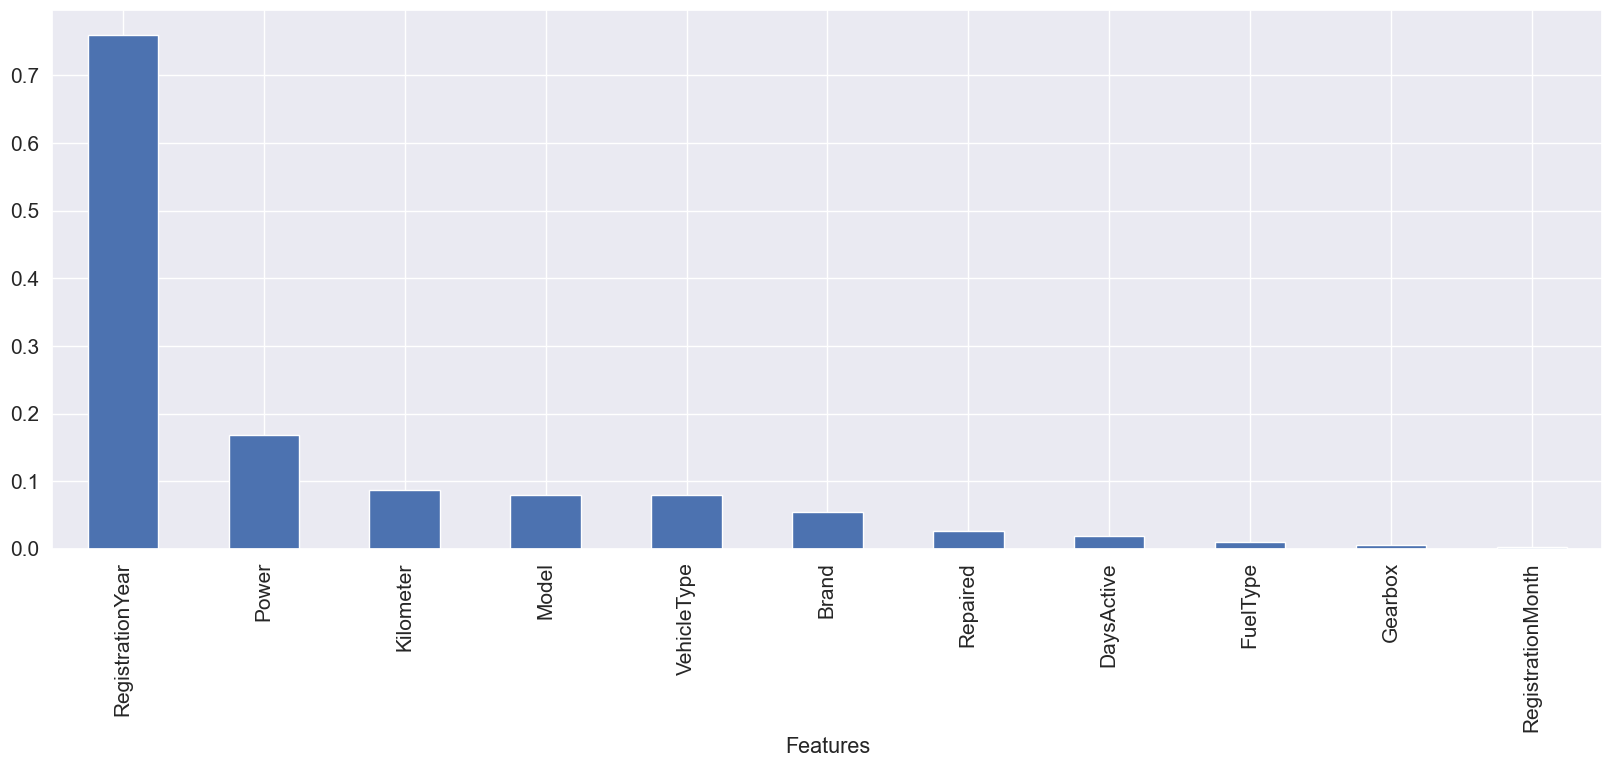

In [81]:
plot_feature_importance(lgbm_optuna)

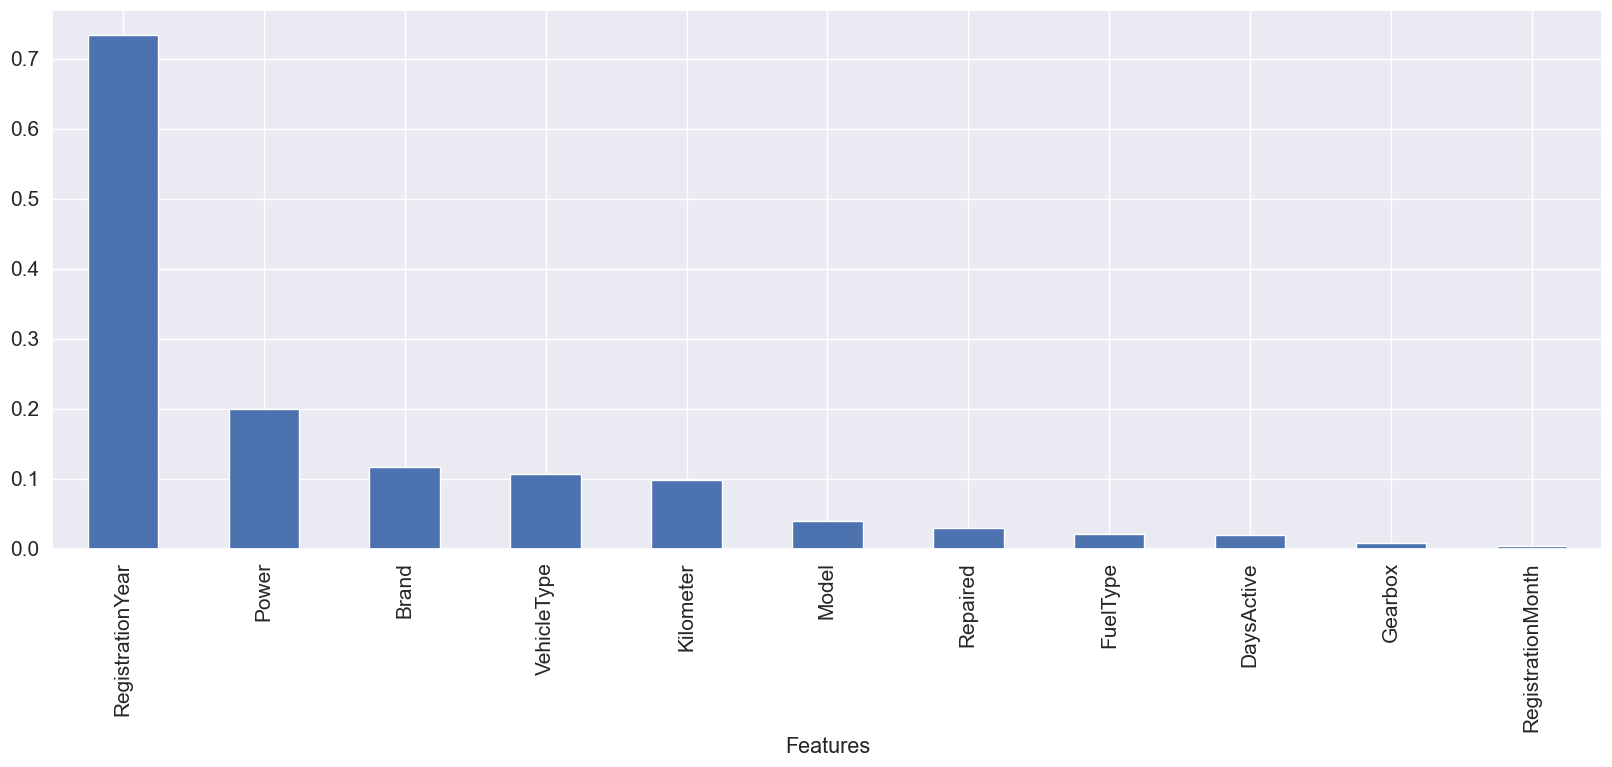

In [82]:
plot_feature_importance(cat_optuna)

Как видим, наши догадки оправдались, для моделей действительно решающим признаком является дата регистрации автомобиля, читай, его возраст.
Второе место по значимости имеет мощность.

А вот в важности дальнейших признаков модели несколько расходятся: для LGBM важнее пробег и модель автомобиля, а CatBoost отдает большее предпочтение Марке, пробег и тип кузова для него более вторичны.

В том, что на качество предсказаний оказывают наименьшее влияние Тип топлива, Активность пользователя, Коробка передач и Месяц регистрации указывают обе модели.

### Кодирование признаков, формирование пайплайна и подбор гиперпараметров через GridSearchCV.

Теперь, когда мы обучили бустинг-модели и получили их метрики, посмотрим, какие результаты нам могут дать обычные линейные и деревянные модели. Применение таких моделей возвращает нас к проблеме кодирования категориальных признаков, которые могут быть учтены моделями, только пройдя через какой-либо энкодер.

Для линейных моделей хорошо подходит OneHotEncoder(). Вместе с StandardScaler() поместим его в пайплайн, который и будем подавать на вход GridSearchCV для перебора гиперпараметров.  

In [83]:
column_transformer = ColumnTransformer([
    ('encode', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False), cat_cols),
    ('scale', StandardScaler(), num_cols)
    ], remainder='passthrough')

In [84]:
column_transformer.transformers

[('encode',
  OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False),
  ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']),
 ('scale',
  StandardScaler(),
  ['RegistrationYear',
   'Power',
   'Kilometer',
   'RegistrationMonth',
   'DaysActive'])]

Обозначим функцию, которая будет проводить операцию кросс-валидации по метрике RMSE внутри поиска лучших гиперпараметров по сетке, а затем получать метрики с лучшей модели и оформлять их в датафрейм.

In [90]:
def get_metrics_gridsearch(model, column_transformer, params, name):  
    '''функция возвращает метрики после поиска лучшей модели по сетке гиперпараметов и добавляет их в список'''
    
    df_metrics = pd.DataFrame()
    
    pipe = Pipeline([('preprocess', column_transformer),
                      ('model', model)])
    
    search = GridSearchCV(estimator=pipe,
                             param_grid=params,
                             scoring=rmse_scorer,
                             #'neg_root_mean_squared_error',
                             cv=5,
                             n_jobs=-1)
    
    search.fit(features_train, target_train)
    
    # время обучения модели
    fit_time = search.cv_results_['mean_fit_time'][0]
    
    # время предсказания модели
    pred_time = search.cv_results_['mean_score_time'][0]
    
    # значение метрики
    model_rmse = - search.best_score_
    
    df_metrics['Модель'] = [name]
    df_metrics['Время обучения, сек'] = round(fit_time, 4)
    df_metrics['Время предсказания, сек'] = round(pred_time, 4)
    df_metrics['RMSE'] = model_rmse
    
    names.append(name)
    rmse_scores.append(model_rmse)
    fit_times.append(fit_time)
    predict_times.append(pred_time)
    
    #print(f'Время обучения: {fit_time:.4f} сек., время предсказания: {pred_time:.4f} сек.')
    #print(f'Метрика RMSE для модели {name}: {model_rmse}')
    
    return df_metrics

### Линейная регрессия.

In [86]:
model_lr = LinearRegression()

params_lr = {}

In [87]:
metrics = metrics.append(get_metrics_gridsearch(model_lr, column_transformer, params_lr, 'LinearRegression'))
metrics

Модель  Время обучения, сек  Время предсказания, сек  \
0  CatBoost_baseline              68.3546                   0.1256   
0      LGBM_baseline               0.4220                   0.0380   
0        LGBM_Optuna               2.2463                   0.2650   
0    CatBoost_Optuna              89.5524                   0.0610   
0   LinearRegression               9.2093                   0.1718   

          RMSE  
0  1404.420295  
0  1424.774998  
0  1364.361654  
0  1380.054872  
0 -2005.557680

### ElasticNet с подбором гиперпараметров.

In [91]:
model_elastic = ElasticNet(random_state=RANDOM)

# объявляем перебираемые гиперпараметры
params_elastic = {'model__alpha' : np.arange(0.2, 0.9, 0.2),
                  'model__l1_ratio' : np.arange(0.2, 0.9, 0.2),
                  'model__max_iter' : range(500, 2001, 500)}   

In [ ]:
metrics = metrics.append(get_metrics_gridsearch(model_elastic, column_transformer , params_elastic, 'ElasticNet'))

In [98]:
metrics

Модель  Время обучения, сек  Время предсказания, сек  \
0  CatBoost_baseline              68.3546                   0.1256   
0      LGBM_baseline               0.4220                   0.0380   
0        LGBM_Optuna               2.2463                   0.2650   
0    CatBoost_Optuna              89.5524                   0.0610   
0   LinearRegression               9.2093                   0.1718   
0         ElasticNet               9.3760                   0.3312   

          RMSE  
0  1404.420295  
0  1424.774998  
0  1364.361654  
0  1380.054872  
0  2005.557680  
0  2157.965444

### DecisionTreeRegressor с подбором гиперпараметров.

Для деревянных моделей гораздо лучше подходит другой тип кодировщика OrdinalEncoder(), соответственно, переопределяем трансформер, который будет подаваться в пайплайн.

In [106]:
column_transformer_wood = ColumnTransformer([('encode', OrdinalEncoder(
        categories = [auto_normal[col].unique().tolist() for col in cat_cols], 
        dtype=np.int16, 
        encoded_missing_value=-1), cat_cols),
    ('scale', StandardScaler(), num_cols)
    ])

In [110]:
column_transformer_wood

ColumnTransformer(transformers=[('encode',
                                 OrdinalEncoder(categories=[['unknown', 'suv',
                                                             'small', 'sedan',
                                                             'convertible',
                                                             'bus', 'wagon',
                                                             'coupe', 'other'],
                                                            ['manual', 'auto',
                                                             'unknown'],
                                                            ['golf', 'grand',
                                                             'fabia', '3er',
                                                             '2_reihe', 'c_max',
                                                             '3_reihe',
                                                             'passat', 'polo',
                                                             'twingo',
                                                             'a_klasse',
                                                             'scirocco', '5er',
                                                             'arosa', 'other',
                                                             'c4', 'civic',
                                                             'punto',
                                                             'e_klasse', 'clio',
                                                             'kadett',...
                                                             'subaru', 'volvo',
                                                             'mitsubishi',
                                                             'audi', 'kia',
                                                             'hyundai',
                                                             'lancia', 'toyota',
                                                             'chevrolet',
                                                             'dacia', 'suzuki',
                                                             'sonstige_autos', ...],
                                                            ['unknown', 'no',
                                                             'yes']],
                                                dtype=<class 'numpy.int16'>,
                                                encoded_missing_value=-1),
                                 ['VehicleType', 'Gearbox', 'Model', 'FuelType',
                                  'Brand', 'Repaired']),
                                ('scale', StandardScaler(),
                                 ['RegistrationYear', 'Power', 'Kilometer',
                                  'RegistrationMonth', 'DaysActive'])])

In [101]:
model_dec_tree = DecisionTreeRegressor(random_state=RANDOM)

# объявляем перебираемые гиперпараметры
params_dec_tree = {'model__max_depth' : range(10, 21, 1),
                   'model__min_samples_split' : range(5, 26, 5),
                   'model__min_samples_leaf' : range(2, 12, 3)}

In [108]:
metrics = metrics.append(get_metrics_gridsearch(model_dec_tree, column_transformer_wood, params_dec_tree, 'DecisionTree'))

In [109]:
metrics

Модель  Время обучения, сек  Время предсказания, сек  \
0  CatBoost_baseline              68.3546                   0.1256   
0      LGBM_baseline               0.4220                   0.0380   
0        LGBM_Optuna               2.2463                   0.2650   
0    CatBoost_Optuna              89.5524                   0.0610   
0   LinearRegression               9.2093                   0.1718   
0         ElasticNet               9.3760                   0.3312   
0       DecisionTree               0.9943                   0.0764   

          RMSE  
0  1404.420295  
0  1424.774998  
0  1364.361654  
0  1380.054872  
0  2005.557680  
0  2157.965444  
0  1636.133110

### Выводы по разделу

Нами были обучены 5 моделей:

- две модели градиентного бустинга CatBoostRegressor и LGBMRegressor, без дополнительных гиперпараметров и с перебором гиперпараметров через Optuna,
- две линейные модели, классическая линейная регрессия и ElasticNet, использующая L1 и L2 регуляризацию, 
- деревянная модель Решающее дерево.

Там где доступно, был произведен поиск наилучших гиперпараметров.
Собирались такие метрики как Время обучения модели в секундах, Время предсказания модели в секундах и ключевая метрика RMSE. Все метрики формировалиь в датафрейм для дальнейшего анализа.

## Анализ моделей

Для удобства анализа визуализируем распределение метрик в разрезе моделей от наименьшей к наибольшей с помощью барплотов.

In [ ]:
metrics.set_index('Модель', inplace=True)

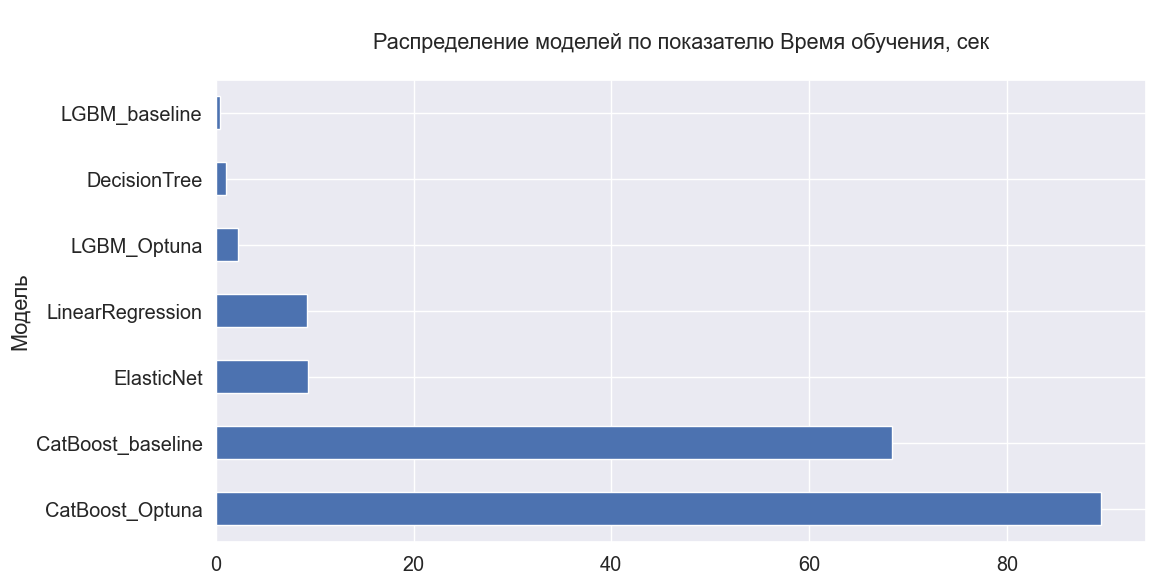

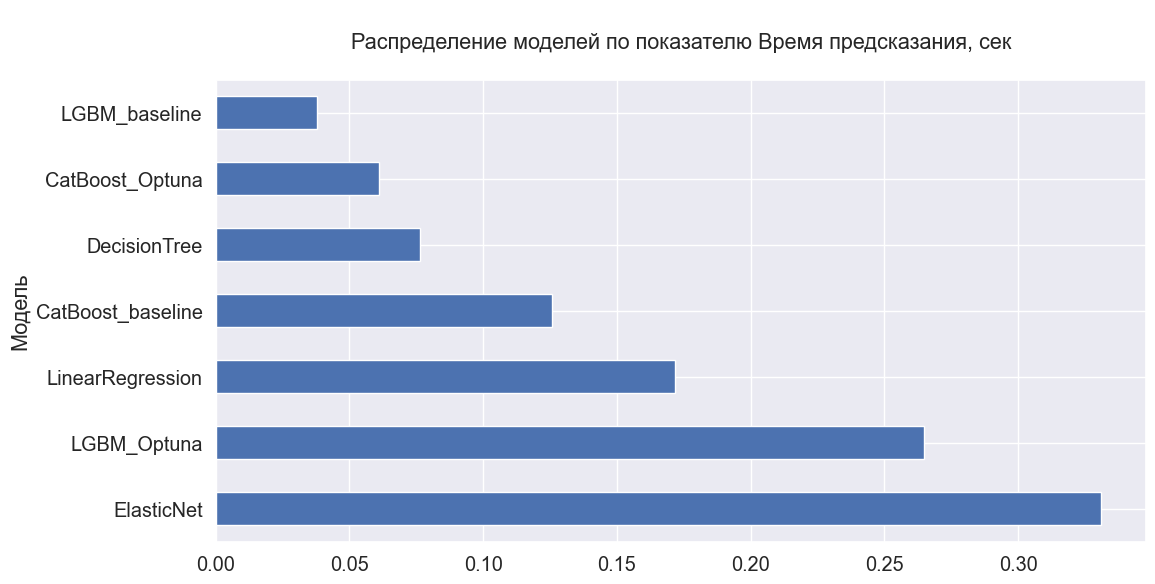

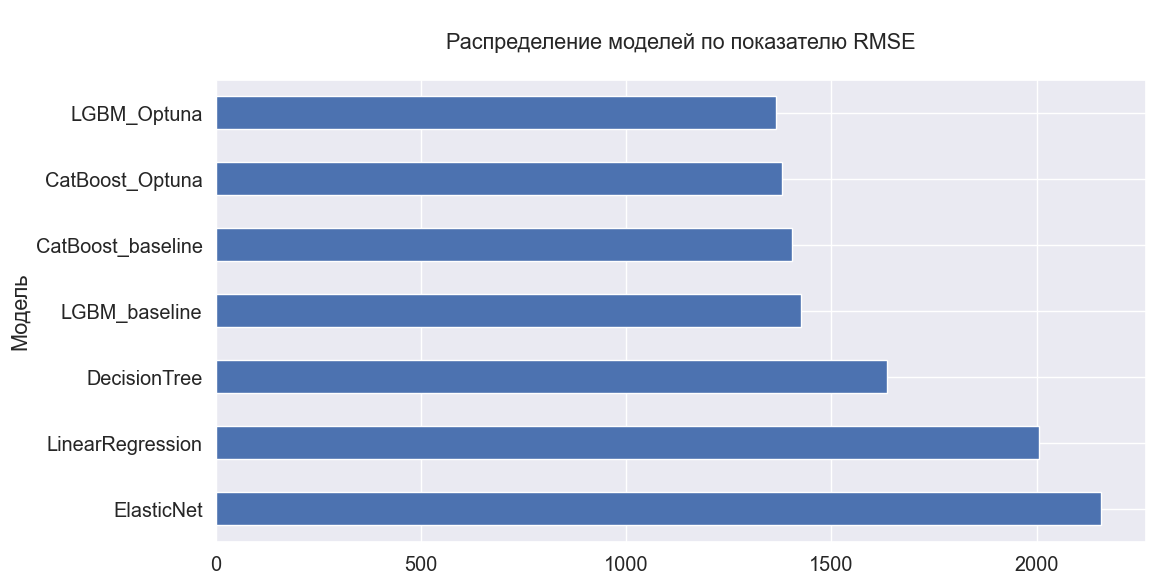

In [133]:
for col in metrics.columns:
    metrics.sort_values(col, ascending=False)[col].plot(kind='barh', title=f'\nРаспределение моделей по показателю {col}\n', figsize=(12, 6))
    plt.show();

**Выводы**

Лучшей моделью по метрике `Время обучения` является LGBMRegressor "из коробки", без подбора гиперпараметров - он показывает результат в 0.4220. За ним идет Решающее дерево с показателем 0.9943 секунды и тот же LGBM с подобранными через Optuna наилучшими гиперпараметрами, его результат 2.2463. Самым тяжелым и долгим с точки зрения обучения был CatBoost.

По метрике `Время предсказания` модели распределились более равномерно, здесь лидерами являются LGBMRegressor "из коробки" и CatBoost с лучшими параметрами из Optuna. Немногим хуже показывает себя Решающее дерево. Самой тяжеловесной по части составления прогноза была ElasticNet.

Наконец, по ключеной метрике `RMSE`, то есть по ошибке предсказаний:

- похожие результаты показывают бустинг модели с размахом значений от 1364 до 1424, 
- на второй месте деревянная модель со скором в районе 1636,
- завершают список линейные модели, они не смогли выдать ошибку меньше 2000.

Таким образом, проанализировав все составляющие, для финального тестирования я рекомендую остановиться на LGBMRegressor с подобранными на Optuna гиперпараметрами, так как он не только быстро обучается, но и выдает наилучший RMSE.

## Тестирование лучшей модели.

In [135]:
#задаем лучшую модель
best_model = LGBMRegressor(**study_lgbm.best_params, metric='rmse')

In [137]:
# в явном виде переводим категориальные колонки тестовой выборки в нужный для LGBM тип
features_test[cat_cols] = features_test[cat_cols].astype('category')

In [139]:
fit_start_time = time()  
# время обучения модели
best_model.fit(features_train,
          target_train,
          eval_set=(features_test, target_test),
          verbose=1)
fit_time = time() - fit_start_time
    
# время предсказания модели
predict_start_time = time()  
y_pred = best_model.predict(features_test)
pred_time = time() - predict_start_time
    
# значение метрики
best_model_rmse = rmse(target_test, y_pred)

[LightGBM] [Warning] min_data_in_leaf is set=249, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=249
[1]	valid_0's rmse: 3369.9
[2]	valid_0's rmse: 3077.7
[3]	valid_0's rmse: 2899
[4]	valid_0's rmse: 2663.12
[5]	valid_0's rmse: 2469.61
[6]	valid_0's rmse: 2296.73
[7]	valid_0's rmse: 2149.84
[8]	valid_0's rmse: 2024.5
[9]	valid_0's rmse: 1927.75
[10]	valid_0's rmse: 1847.36
[11]	valid_0's rmse: 1773.48
[12]	valid_0's rmse: 1718.14
[13]	valid_0's rmse: 1667.22
[14]	valid_0's rmse: 1625.65
[15]	valid_0's rmse: 1588.74
[16]	valid_0's rmse: 1558.43
[17]	valid_0's rmse: 1535.27
[18]	valid_0's rmse: 1514.03
[19]	valid_0's rmse: 1497.86
[20]	valid_0's rmse: 1482.69
[21]	valid_0's rmse: 1469.17
[22]	valid_0's rmse: 1459.17
[23]	valid_0's rmse: 1450.4
[24]	valid_0's rmse: 1442.05
[25]	valid_0's rmse: 1435.52
[26]	valid_0's rmse: 1429.27
[27]	valid_0's rmse: 1423.52
[28]	valid_0's rmse: 1419.21
[29]	valid_0's rmse: 1415.23
[30]	valid_0's rmse: 1411.72
[31]	valid_0's rmse: 1

In [140]:
print(f'Время обучения: {fit_time:.4f} сек., время предсказания: {pred_time:.4f} сек.')
print(f'Метрика RMSE для лучшей модели на тестовой выборке: {best_model_rmse}')

Время обучения: 2.3039 сек., время предсказания: 0.3921 сек.
Метрика RMSE для лучшей модели на тестовой выборке: 1344.64464173425


Сравним полученный результат с константной моделью, выдающей в качестве предсказаний среднее значение.

In [141]:
dummy_model = DummyRegressor(strategy='mean')

dummy_model.fit(features_train, target_train)
dummy_preds = dummy_model.predict(features_test)

dummy_model_rmse = rmse(target_test, dummy_preds)
print(f'Метрика RMSE для константной модели на тестовой выборке: {dummy_model_rmse}')

Метрика RMSE для константной модели на тестовой выборке: 3710.268028626857


Визуализируем важность признаков датасета для нашей финальной модели.

In [154]:
def feature_importances(model, columns):
    '''функция выводит важность признаков в построении модели'''
    
    feats={}
    for feature, importance in zip(columns, model.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Важность признака'})
    importances = importances.sort_values(by='Важность признака', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index' : 'Признаки'})
    importances = importances[importances['Важность признака'] > 0.001]
    
    sns.set(font_scale=1)
    sns.set(style='whitegrid', color_codes=True, font_scale=1.2)
    fig, ax = plt.subplots()
    fig.figsize=(12, 12)
    sns.barplot(x=importances['Важность признака'], y=importances['Признаки'], data=importances, color='skyblue')
    plt.xlabel('Важность признака', fontsize=14, weight='bold')
    plt.ylabel('Признаки', fontsize=14, weight='bold')
    plt.title('Важность признаков в модели', fontsize=16, weight='bold')
    
    plt.show()
    display(importances)

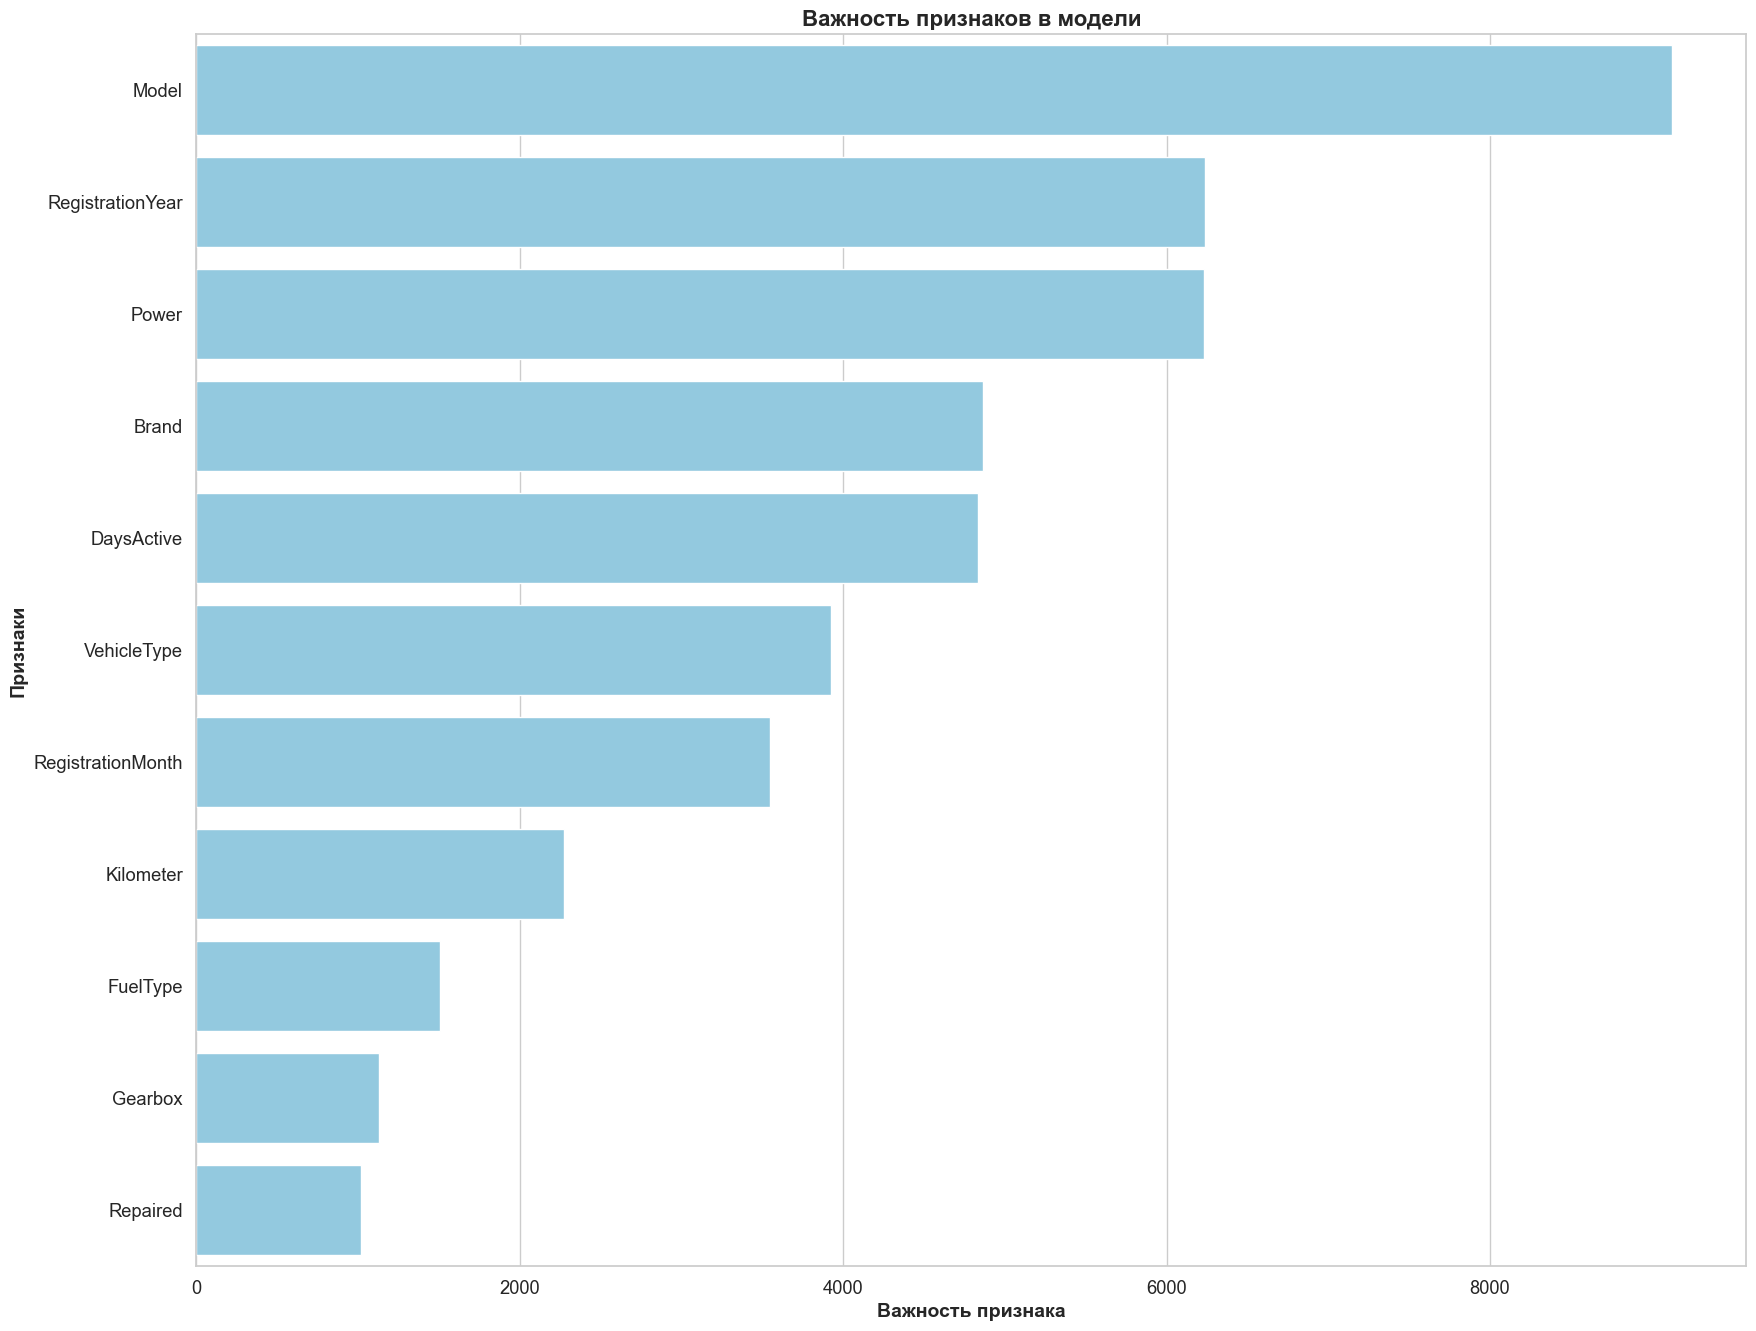

Признаки  Важность признака
0               Model               9128
1    RegistrationYear               6235
2               Power               6232
3               Brand               4867
4          DaysActive               4834
5         VehicleType               3928
6   RegistrationMonth               3545
7           Kilometer               2273
8            FuelType               1510
9             Gearbox               1130
10           Repaired               1018

In [155]:
feature_importances(best_model, features_train.columns)

**Выводы**

- При проверке лучшей модели LGBMRegressor на отложенной тестовой выборке удалось получить итоговое значение метрики RMSE равное 1344.645. 
- Это значение значительно ниже baseline 3710.268, полученного на DummyRegressor, что означает, что наше исследование прошло успешно и нам удалось достичь его цели - чтобы наша модель помогала пользователям быстро и качественно (с наименьшей ошибкой) узнать рыночную стоимость своего автомобиля при пользовании нашим сервисом.

## Выводы по исследованию

Целью нашего исследования являлось построение такой модели машинного обучения, которая помогала бы пользователям сервиса по продаже автомобилей быстро и с наименьшей ошибкой оценить рыночную стоимость своего автомобиля. Качество моделей оценивалось по 3м критериям, которые отметил заказчик: качеству предсказаний (оно оценивалось через метрику RMSE), скорость предсказания и время обучения. 

В нашем распоряжении был большой датасет с более чем 350 тысячами записей и 16 признаками. Каждая запись содержала информацию о конкретном автомобиле: как его технические характеристики (модель, марка, тип кузова/коробки передач/топлива, пробег и мощность), так и информацию о его состоянии (год регистрации и была ли машина в ремонте) и вспомогательную информацию об анкете и активности пользователя, которому принадлежит автомобиль.

В процессе подготовки данных и проведения EDA:
    
- Были изучены данные и их основные характеристики, общая информация о датасете, выявлены аномалии, пропуски и явные дубликаты;
- Были рассмотрены и визуализированы распределения числовых признаков, изучена зависимость целевого признака от значений категориальных фичей;
- Отсечены аномалии в признаках по значению квантилей, заполнены пропуски и нулевые значения;
- Добавлен новых столбец с количеством дней активности пользовател, неинформативные столбцы удалены из датасета;
- Изучена корреляци между признаками на предмет проблемы мультиколлинерности, мультиколлениарности между числовыми признаками не обнаружено.

Далее данные были разделены на фичи и таргет, была отделена тестовая выборка и получено разделение обучающей и валидационной выборки, после чего мы приступили к процессу обучени моделей.

Нами были обучены 5 моделей (там где доступно, производился поиск наилучших гиперпараметров):

- две модели градиентного бустинга CatBoostRegressor и LGBMRegressor, без дополнительных гиперпараметров и с перебором гиперпараметров через Optuna,
- две линейные модели, классическая линейная регрессия и ElasticNet, использующая L1 и L2 регуляризацию, 
- деревянная модель Решающее дерево.

Далее результаты были визуализированы и проведен анализ моделей по Времени обучения, Времени предсказания и RMSE, который показал, что по соотношению этих характеристик наилучшим выбором является LGBMRegressor, гиерпараметры для которого были выбраны с помощью Optuna.

Наилучшая модель была протестирована на отложенной ранее тестовой выборке, которую до этого не видела ни одна модель. Таким образом, удалось получить итоговое значение метрики RMSE равное 1344.645, что значительно ниже baseline 3710.268, полученного на константной модели DummyRegressor.

Самыми важными признаками для модели оказались: 
    
- `Model` — модель автомобиля
- `RegistrationYear` — год регистрации автомобиля
- `Power` — мощность (в л.с.)

Таким образом, цель исследования по поиску модели оптимальной по быстроте и качеству предсказаний для оценки рыночной стоимости автомобилей была решена с помощью модели градиентного бустинга.